In [1]:

# NASA Patent Data Analysis

#This analysis explores NASA patent data, focusing on various aspects such as the status of patents,percentage of Patents issued each year,Patents by NaSA center . The objective is to uncover insights and trends within the dataset.


import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def fetch_nasa_data(api_endpoint):
    try:
        # Send a GET request to the API endpoint
        response = requests.get(api_endpoint)
        response.raise_for_status()
        # Parse the response data (assuming JSON)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None
# Define the API endpoint for NASA data
api_endpoint = "https://data.nasa.gov/resource/gquh-watm.json"
data = fetch_nasa_data(api_endpoint)
print(data)

[{'center': 'NASA Kennedy Space Center', 'status': 'Application', 'case_number': 'KSC-12871', 'patent_number': '0', 'application_sn': '13/033,085', 'title': 'Polyimide Wire Insulation Repair System'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14048-1', 'patent_number': '5694939', 'application_sn': '08/543,093', 'title': 'Autogenic-Feedback Training Exercise Method & System', 'patent_expiration_date': '2015-10-03T00:00:00.000'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14231-1', 'patent_number': '6109270', 'application_sn': '09/017,519', 'title': 'Multimodality Instrument For Tissue Characterization', 'patent_expiration_date': '2017-02-04T00:00:00.000'}, {'center': 'NASA Ames Research Center', 'status': 'Issued', 'case_number': 'ARC-14231-2DIV', 'patent_number': '6976013', 'application_sn': '10/874,003', 'title': 'Metrics For Body Sensing System', 'patent_expiration_date': '2024-06-16T00:00:00.000'}, {'center':

In [3]:
#creating a DataFrame
df=pd.DataFrame(data)

In [5]:
df

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,NaN
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03T00:00:00.000
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16T00:00:00.000
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,NaN,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09T00:00:00.000
996,NASA Glenn Research Center,Application,LEW-18928-1,NaN,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,NaN
997,NASA Glenn Research Center,Application,LEW-18934-1,NaN,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23T00:00:00.000
998,NASA Glenn Research Center,Application,LEW-18939-1,NaN,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13T00:00:00.000


In [6]:
#Columns in the DataFrame
df.columns

Index(['center', 'status', 'case_number', 'patent_number', 'application_sn',
       'title', 'patent_expiration_date'],
      dtype='object')

In [8]:
df.head(10)

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,NaN
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03T00:00:00.000
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16T00:00:00.000
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
5,NASA Ames Research Center,Issued,ARC-14275-1,6445390,"09/226,673",Automated Triangle Geometry Processing For Sur...,2018-12-24T00:00:00.000
6,NASA Ames Research Center,Issued,ARC-14281-1,6606612,"09/374,491",Aerodynamic Design Using Neural Networks,2019-08-13T00:00:00.000
7,NASA Ames Research Center,Issued,ARC-14281-3,7191161,"10/637,087",Method For Constructing Composite Response Sur...,2020-11-18T00:00:00.000
8,NASA Ames Research Center,Issued,ARC-14359-1,6314362,"09/498,123",A Direct-To Controller Tool (A Component Of Th...,2020-02-02T00:00:00.000
9,NASA Ames Research Center,Issued,ARC-14494-1,6720984,"09/606,107",Bio-Electric Keyboard/Mouse/Joystick Interface...,2020-06-13T00:00:00.000


In [10]:
#Descriptive Statistics of the Dataframe
df.describe(include="all")

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
count,1000,1000,1000,776,998,1000,729
unique,8,2,1000,646,994,929,601
top,NASA Langley Research Center,Issued,KSC-12871,0,"11/213,604",Otoacoustic Protection In Biologically-Inspire...,2030-07-19T00:00:00.000
freq,349,646,1,129,2,6,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   center                  1000 non-null   object
 1   status                  1000 non-null   object
 2   case_number             1000 non-null   object
 3   patent_number           776 non-null    object
 4   application_sn          998 non-null    object
 5   title                   1000 non-null   object
 6   patent_expiration_date  729 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [27]:
def clean_data(data):
    df = pd.DataFrame(data)
    #Replacing NaN values in patent_number column of dataFRame to 'pending'
    df['patent_number'] = df['patent_number'].replace(np.NaN, 'pending')
    df['patent_expiration_date'] = pd.to_datetime(df['patent_expiration_date']).fillna(pd.Timestamp.now()).dt.date
    return df

df = clean_data(data)
df



,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,2024-08-03
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,pending,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09
996,NASA Glenn Research Center,Application,LEW-18928-1,pending,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,2024-08-03
997,NASA Glenn Research Center,Application,LEW-18934-1,pending,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23
998,NASA Glenn Research Center,Application,LEW-18939-1,pending,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13


In [24]:
df


,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,2024-08-01
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04
...,...,...,...,...,...,...,...
995,NASA Glenn Research Center,Application,LEW-18923-1,pending,"13/963,060",New Power Source For Deep Space Missions- Util...,2033-08-09
996,NASA Glenn Research Center,Application,LEW-18928-1,pending,NaN,Pt-Ti-Si Simultaneous Ohmic Contacts to N- and...,2024-08-01
997,NASA Glenn Research Center,Application,LEW-18934-1,pending,"13/900,642",Conditionally Active Min-Max Limit Regulators,2033-05-23
998,NASA Glenn Research Center,Application,LEW-18939-1,pending,"13/916,797","Magnetostrictive Alternator - Low cost, No mov...",2033-06-13


In [69]:
df.dtypes
df['patent_expiration_date']= pd.to_datetime(df['patent_expiration_date'])
df['patent_expiration_date'].dt.year

0      2024
1      2015
2      2017
3      2024
4      2017
       ... 
995    2033
996    2024
997    2033
998    2033
999    2033
Name: patent_expiration_date, Length: 1000, dtype: int32

In [29]:
def analyze_patents(df):
    unique_applications = df['application_sn'].nunique()
    # Dropping duplicate rows 
    df_cleaned = df.drop_duplicates(subset='application_sn', keep='first')
    
    
    return unique_applications, df_cleaned

unique_applications, df_cleaned = analyze_patents(df)
print(df_cleaned.head())
print(f"Unique applications: {unique_applications}")



                      center       status     case_number patent_number  \
0  NASA Kennedy Space Center  Application       KSC-12871             0   
1  NASA Ames Research Center       Issued     ARC-14048-1       5694939   
2  NASA Ames Research Center       Issued     ARC-14231-1       6109270   
3  NASA Ames Research Center       Issued  ARC-14231-2DIV       6976013   
4  NASA Ames Research Center       Issued     ARC-14231-3       6718196   

  application_sn                                              title  \
0     13/033,085            Polyimide Wire Insulation Repair System   
1     08/543,093  Autogenic-Feedback Training Exercise Method & ...   
2     09/017,519  Multimodality Instrument For Tissue Characteri...   
3     10/874,003                    Metrics For Body Sensing System   
4     09/652,299  Multimodality Instrument For Tissue Characteri...   

  patent_expiration_date  
0             2024-08-03  
1             2015-10-03  
2             2017-02-04  
3             

<Axes: xlabel='status', ylabel='center'>

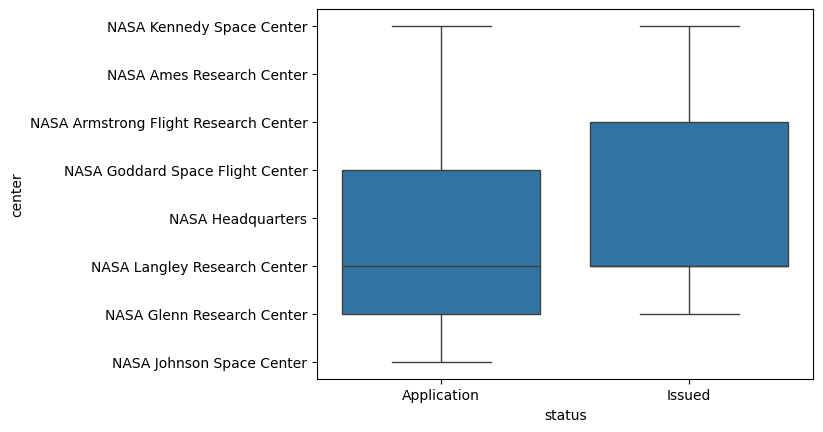

In [42]:
#Plotting a box plot
sns.boxplot(x="status",y="center",data=df)

In [44]:
#summarizing Categorical Data 
pd.crosstab(df['status'],df['center'])

center,NASA Ames Research Center,NASA Armstrong Flight Research Center,NASA Glenn Research Center,NASA Goddard Space Flight Center,NASA Headquarters,NASA Johnson Space Center,NASA Kennedy Space Center,NASA Langley Research Center
status,,,,,,,,
Application,38,9,103,64,0,1,29,110
Issued,100,12,107,129,1,0,58,239


In [45]:
#summarizing Categorical Data 
pd.crosstab(df['status'],df['patent_expiration_date'])

patent_expiration_date,1930-06-29,1930-11-18,1930-12-16,1931-02-05,1931-05-07,1931-05-26,1931-07-01,1931-10-15,1931-12-07,1932-04-03,...,2033-09-09,2033-09-11,2033-09-26,2033-09-30,2033-11-14,2033-12-02,2033-12-13,2034-01-30,2034-02-27,2034-03-10
status,,,,,,,,,,,,,,,,,,,,,
Application,0,1,0,0,0,0,0,0,0,1,...,1,1,3,4,2,1,1,1,1,2
Issued,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='status', ylabel='count'>

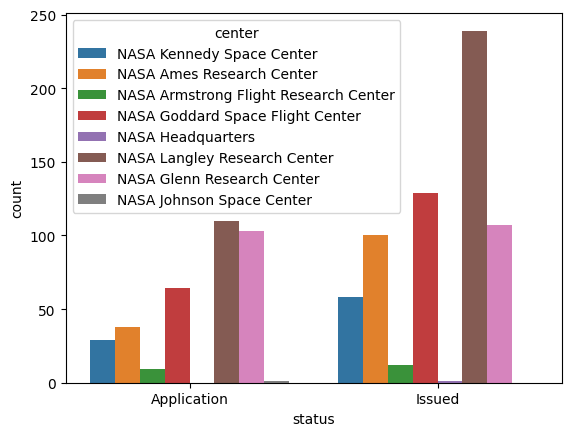

In [47]:
sns.countplot(x="status",hue="center",data=df)

In [5]:
# Creating a piviot table 
pd.pivot_table(df,index=['status'],columns=['center'],aggfunc=len)
            

application_sn                                        \
center      NASA Ames Research Center NASA Armstrong Flight Research Center   
status                                                                        
Application                      38.0                                   9.0   
Issued                          100.0                                  12.0   

                                                                         \
center      NASA Glenn Research Center NASA Goddard Space Flight Center   
status                                                                    
Application                      103.0                             64.0   
Issued                           107.0                            129.0   

                                                         \
center      NASA Headquarters NASA Johnson Space Center   
status                                                    
Application               NaN                       1.0   
Issued                    1.0                       NaN   

                                                                    \
center      NASA Kennedy Space Center NASA Langley Research Center   
status                                                               
Application                      29.0                        110.0   
Issued                           58.0                        239.0   

                          case_number                                        \
center      NASA Ames Research Center NASA Armstrong Flight Research Center   
status                                                                        
Application                      38.0                                   9.0   
Issued                          100.0                                  12.0   

             ...             patent_number                               \
center       ... NASA Kennedy Space Center NASA Langley Research Center   
status       ...                                                          
Application  ...                      29.0                        110.0   
Issued       ...                      58.0                        239.0   

                                title                                        \
center      NASA Ames Research Center NASA Armstrong Flight Research Center   
status                                                                        
Application                      38.0                                   9.0   
Issued                          100.0                                  12.0   

                                                                         \
center      NASA Glenn Research Center NASA Goddard Space Flight Center   
status                                                                    
Application                      103.0                             64.0   
Issued                           107.0                            129.0   

                                                         \
center      NASA Headquarters NASA Johnson Space Center   
status                                                    
Application               NaN                       1.0   
Issued                    1.0                       NaN   

                                                                    
center      NASA Kennedy Space Center NASA Langley Research Center  
status                                                              
Application                      29.0                        110.0  
Issued                           58.0                        239.0  

[2 rows x 40 columns]

In [54]:
df['patent_expiration_date'].std()

Timedelta('6699 days 04:59:15.496549376')

C:\Users\shaur\AppData\Local\Temp\ipykernel_27420\3369713001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['patent_expiration_date'])


<Axes: xlabel='patent_expiration_date', ylabel='Density'>

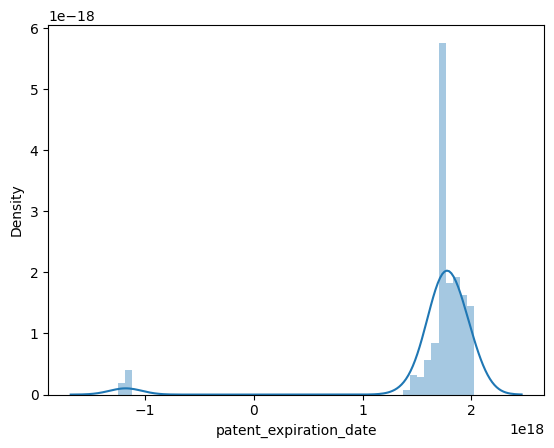

In [55]:
sns.distplot(df['patent_expiration_date'])

In [60]:

corr=df.corr(numeric_only=True)
corr

,patent_expiration_year
patent_expiration_year,1.0


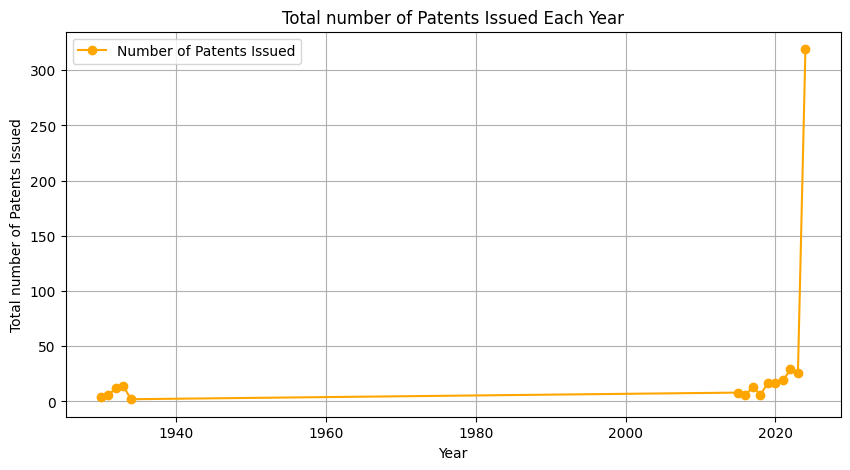

In [66]:



def plot_patents_by_year(df):
    
    patents_count_by_year = df_cleaned[(df_cleaned['patent_expiration_date'].dt.year< 2025)]['patent_expiration_date'].dt.year.value_counts().sort_index()
    
    plt.figure(figsize=(10, 5))
    plt.plot(patents_count_by_year.index, patents_count_by_year.values, marker='o', linestyle='-',color='orange',label='Number of Patents Issued')
    plt.xlabel('Year')
    plt.ylabel('Total number of Patents Issued')
    plt.legend(loc='upper left')
    plt.title('Total number of Patents Issued Each Year')
    plt.grid(True)
    plt.show()

plot_patents_by_year(df_cleaned) 

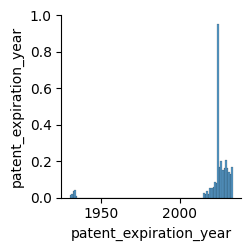

In [52]:
# Plotting pair Plot
sns.pairplot(df)

In [76]:
# Identifying Patents with status of Issued and year <2025
def Patent_Granted(df):
 patent_granted  = df_cleaned[(df_cleaned['status']=='Issued') & (df_cleaned['patent_expiration_date'].dt.year< 2025)]
 return patent_granted
 
patent_granted_df = Patent_Granted(df_cleaned)

# Print the patents granted
print("Patents Granted:")
print(patent_granted_df)

Patents Granted:
                         center  status     case_number patent_number  \
1     NASA Ames Research Center  Issued     ARC-14048-1       5694939   
2     NASA Ames Research Center  Issued     ARC-14231-1       6109270   
3     NASA Ames Research Center  Issued  ARC-14231-2DIV       6976013   
4     NASA Ames Research Center  Issued     ARC-14231-3       6718196   
5     NASA Ames Research Center  Issued     ARC-14275-1       6445390   
..                          ...     ...             ...           ...   
825  NASA Glenn Research Center  Issued     LEW-17618-1       7015304   
836  NASA Glenn Research Center  Issued     LEW-17672-1       7261783   
839  NASA Glenn Research Center  Issued     LEW-17704-1       7250723   
857  NASA Glenn Research Center  Issued     LEW-17951-1       8545786   
869  NASA Glenn Research Center  Issued     LEW-18059-1       8242162   

    application_sn                                              title  \
1       08/543,093  Autogenic-Fee

In [63]:
#counting the no. of patents by year 


In [87]:
def patents_by_year(df):
    
  year_count = df_cleaned['patent_expiration_date'].dt.year.value_counts().sort_index(ascending=False)    

  total_patents = year_count.sum()
  percentage_year = round((year_count/ total_patents)*100,2)
  return percentage_year,year_count
percentage_year, year_count = patents_by_year(df_cleaned)
patents_by_year
df_sum = pd.DataFrame({
    'Year': year_count.index,
    'Count': year_count.values,
    'Percentage': percentage_year.values
})
df_sum

,Year,Count,Percentage
0,2034,4,0.40
1,2033,53,5.33
2,2032,44,4.42
3,2031,46,4.62
4,2030,55,5.53
5,2029,69,6.93
6,2028,55,5.53
7,2027,50,5.03
8,2026,67,6.73
9,2025,54,5.43


<Axes: >

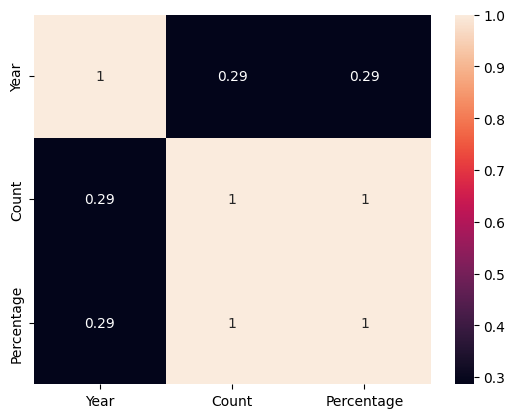

In [89]:
corr=df_sum.corr(numeric_only=True)
corr
sns.heatmap(corr,annot=True)


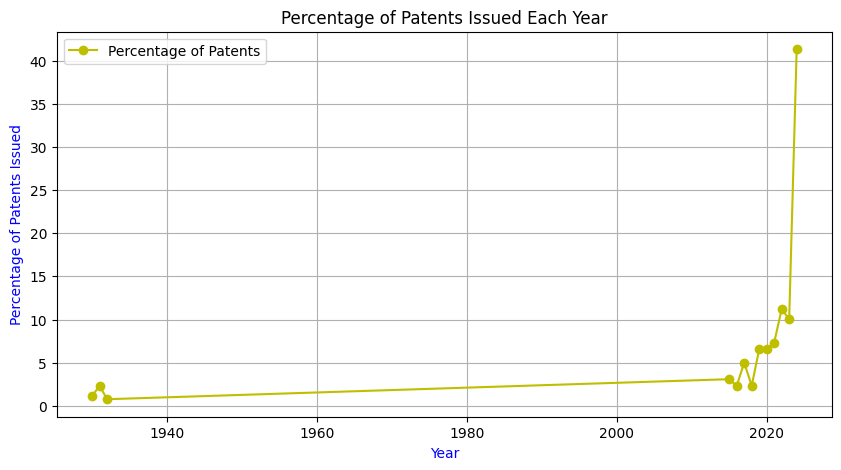

In [103]:
#Plotting line graph between year and Percentage of Patents Issued
def plotting_line_graph(df):
   
 plt.figure(figsize=(10, 5))

 plt.plot(df_sum['Year'], df_sum['Percentage'], marker='o', linestyle ='-',label='Percentage of Patents',color='y')
 plt.legend(loc='upper left')
 plt.xlabel('Year',color='b')
 plt.ylabel('Percentage of Patents Issued',color='b')
 plt.title('Percentage of Patents Issued Each Year')

 plt.grid(True)
 plt.show()
plotting_line_graph(df_cleaned)
#Analysis:There has been a sharp increase in the number of patents issued since 2019 to 2024data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0kAAAHWCAYAAACi1sL/AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAByuElEQVR4nO3dd3iT5f7H8U+60t1C6QBbhhSZgsoSlb1VBAFRUUGOAxVUQI/I0aOAehCPgnhE3KDnyE9FUXGBBZkKCMhWkSJbNrSlFNq0eX5/xKQNHSSQNE37fl1XLpr7Wd8nuRvy7b1MhmEYAgAAAABIkgJ8HQAAAAAAVCQkSQAAAABQBEkSAAAAABRBkgQAAAAARZAkAQAAAEARJEkAAAAAUARJEgAAAAAUQZIEAAAAAEWQJAEAAABAESRJAIASzZ8/X5dddplCQ0NlMpmUkZHh65BQDnbt2iWTyaRZs2b5OpQSderUSc2aNfN1GAAqOZIkAF43a9YsmUwmxyM0NFSXXHKJRo4cqUOHDvk6vAv2yy+/aPz48dq1a5evQ/GYY8eOadCgQQoLC9P06dP13//+VxERESXu6+n391//+pc+//zzC7wD18yePVsvv/yyx85nTzBefPFFj52zolqyZInT+37248MPP/R1iE5WrlypgIAAjRs3rsTtkydPlslk0tdff13OkQGoiIJ8HQCAqmPixImqV6+ezpw5oxUrVmjGjBn65ptvtGXLFoWHh/s6vPP2yy+/aMKECerUqZPq1q3r63A8Ys2aNTp58qSeeeYZdevWzaVjPPX+/utf/9LAgQPVr1+/84zedbNnz9aWLVs0atQor1+rsnrooYfUunXrYuXt2rXzQTSla9eunYYPH66XXnpJt99+u5o2berYtnv3bk2cOFE33XSTrrvuOh9GCaCiIEkCUG569+6tVq1aSZLuvvtuxcXFacqUKfriiy906623XtC5c3Jy/DrRqmgOHz4sSYqNjXX5GG++v6i42rdvr4EDB/o6DJc8//zz+uKLLzR8+HAtX75cJpNJkvTggw8qODhY06ZNK5c4+LwCKj662wHwmS5dukiSdu7c6Sj73//+p5YtWyosLEzVq1fXLbfcor179zodZx+TsG7dOnXo0EHh4eH6xz/+IUk6c+aMxo8fr0suuUShoaGqWbOm+vfvrx07djiOt1qtevnll9W0aVOFhoYqMTFRw4cP14kTJ5yuU7duXV1//fVasWKF2rRpo9DQUF188cV6//33HfvMmjVLN910kySpc+fOjq5GS5YskSR98cUXuu6661SrVi2ZzWbVr19fzzzzjAoKCoq9HtOnT9fFF1+ssLAwtWnTRsuXL1enTp3UqVMnp/1yc3P19NNPKzU1VWazWSkpKXrssceUm5vr0us+Z84cx2tco0YN3X777dq/f7/T6zt06FBJUuvWrWUymXTnnXe6dO6izn5/X3zxRV111VWKi4tTWFiYWrZsqU8++cTpGJPJpFOnTum9995zvJZFr71//3797W9/U2Jiosxms5o2bap3333X6Rz2bmAff/yxnnvuOSUnJys0NFRdu3ZVenq6031+/fXX2r17t+NaRVsC//Of/6hp06YKDw9XtWrV1KpVK82ePdvt18FisWjChAlq0KCBQkNDFRcXp2uuuUZpaWmOfQ4ePKhhw4YpOTlZZrNZNWvWVN++fZ26cJpMJo0fP77Y+evWrVvs/cnIyNCoUaOUkpIis9ms1NRUTZ48WVartdh+d955p2JiYhQbG6uhQ4d6ZezZzJkz1aVLFyUkJMhsNqtJkyaaMWNGift+++236tixo6KiohQdHa3WrVuX+Lr/8ssv6ty5s8LDw3XRRRfphRdeOGccMTExmjZtmn744Qe9/fbbkqTPPvtMX375pZ5//nnVrFnT5c8HV3+3y/q8AlBx0ZIEwGfsiUtcXJwk6bnnntM///lPDRo0SHfffbeOHDmi//znP+rQoYPWr1/v1Kpx7Ngx9e7dW7fccotuv/12JSYmqqCgQNdff70WLVqkW265RQ8//LBOnjyptLQ0bdmyRfXr15ckDR8+XLNmzdKwYcP00EMPaefOnXr11Ve1fv16/fDDDwoODnZcJz09XQMHDtRdd92loUOH6t1339Wdd96pli1bqmnTpurQoYMeeughvfLKK/rHP/6hxo0bS5Lj31mzZikyMlJjxoxRZGSkvv/+ez311FPKysrSv//9b8d1ZsyYoZEjR6p9+/YaPXq0du3apX79+qlatWpKTk527Ge1WnXDDTdoxYoVuvfee9W4cWNt3rxZU6dO1e+//37OsTz2+27durUmTZqkQ4cOOb402l/jJ554Qg0bNtSbb77p6EJnf+0u5P2dNm2abrjhBt12223Ky8vThx9+qJtuuklfffWVo4vTf//7X919991q06aN7r33XklyXPvQoUO68sorZTKZNHLkSMXHx+vbb7/VXXfdpaysrGJd5p5//nkFBATo0UcfVWZmpl544QXddtttWr16tSTpiSeeUGZmpvbt26epU6dKkiIjIyVJb731lh566CENHDhQDz/8sM6cOaNNmzZp9erVGjx4sFuvw/jx4zVp0iTHfWVlZWnt2rX6+eef1b17d0nSgAEDtHXrVj344IOqW7euDh8+rLS0NO3Zs8ftLpw5OTnq2LGj9u/fr+HDh6t27dr68ccfNW7cOB04cMAxBsswDPXt21crVqzQfffdp8aNG+uzzz5zJMiuOnnypI4ePVqsPC4uztFSM2PGDDVt2lQ33HCDgoKC9OWXX+qBBx6Q1WrViBEjHMfMmjVLf/vb39S0aVONGzdOsbGxWr9+vebPn+/0up84cUK9evVS//79NWjQIH3yyScaO3asLr30UvXu3bvMeO1d6saOHauuXbvq4Ycf1lVXXaXhw4dLcv3zwdXfbankzysAFZwBAF42c+ZMQ5KxcOFC48iRI8bevXuNDz/80IiLizPCwsKMffv2Gbt27TICAwON5557zunYzZs3G0FBQU7lHTt2NCQZr7/+utO+7777riHJmDJlSrEYrFarYRiGsXz5ckOS8cEHHzhtnz9/frHyOnXqGJKMZcuWOcoOHz5smM1m45FHHnGUzZkzx5BkLF68uNh1c3JyipUNHz7cCA8PN86cOWMYhmHk5uYacXFxRuvWrQ2LxeLYb9asWYYko2PHjo6y//73v0ZAQICxfPlyp3O+/vrrhiTjhx9+KHY9u7y8PCMhIcFo1qyZcfr0aUf5V199ZUgynnrqKUeZ/T1bs2ZNqec7e9+y3t+SXou8vDyjWbNmRpcuXZzKIyIijKFDhxa7zl133WXUrFnTOHr0qFP5LbfcYsTExDjOv3jxYkOS0bhxYyM3N9ex37Rp0wxJxubNmx1l1113nVGnTp1i1+rbt6/RtGnTc9772Xbu3GlIMv797387ylq0aGFcd911pR5z4sSJYseURJLx9NNPFyuvU6eO0+v1zDPPGBEREcbvv//utN/jjz9uBAYGGnv27DEMwzA+//xzQ5LxwgsvOPbJz8832rdvb0gyZs6cWWY89te5tMeBAwcc+5b0e9CzZ0/j4osvdjzPyMgwoqKijLZt2zrVT8Mo/P01jMLf//fff99RlpubayQlJRkDBgwoM2a7Xbt2GREREUb16tWN4OBgR51w5/PBld/tovGe/XkFoGKjux2ActOtWzfFx8crJSVFt9xyiyIjI/XZZ5/poosu0ty5c2W1WjVo0CAdPXrU8UhKSlKDBg20ePFip3OZzWYNGzbMqezTTz9VjRo19OCDDxa7tv0v2nPmzFFMTIy6d+/udJ2WLVsqMjKy2HWaNGmi9u3bO57Hx8erYcOG+uOPP1y657CwMMfP9r+4t2/fXjk5Ofrtt98kSWvXrtWxY8d0zz33KCiosIH/tttuU7Vq1ZzON2fOHDVu3FiNGjVyit/ete3s+Itau3atDh8+rAceeEChoaGO8uuuu06NGjW64Fm9ynp/z34tTpw4oczMTLVv314///zzOc9tGIY+/fRT9enTR4ZhON17z549lZmZWew8w4YNU0hIiOO5/X105b2LjY3Vvn37tGbNGpfu/Vzn2rp1q7Zv317i9rCwMIWEhGjJkiXFunSdjzlz5qh9+/aqVq2a0+vUrVs3FRQUaNmyZZKkb775RkFBQbr//vsdxwYGBpb4+1OWp556SmlpacUe1atXd7pHu8zMTB09elQdO3bUH3/8oczMTElSWlqaTp48qccff9ypfkqFv792kZGRuv322x3PQ0JC1KZNG5d/L+vUqaOnn35ax48f15gxYxxTirvz+eDK77ZdSZ9XACo2utsBKDfTp0/XJZdcoqCgICUmJqphw4YKCLD9rWb79u0yDEMNGjQo8diiXeAk6aKLLnL6AizZunc1bNjQKdE42/bt25WZmamEhIQSt9snLLCrXbt2sX2qVavm8pfZrVu36sknn9T333+vrKwsp232L4e7d++WJKWmpjptDwoKKtbVavv27fr1118VHx/vUvxF2a/TsGHDYtsaNWqkFStWlH0z51DW+ytJX331lZ599llt2LDBafzU2V+AS3LkyBFlZGTozTff1JtvvlniPud67+wJpyvv3dixY7Vw4UK1adNGqamp6tGjhwYPHqyrr776nMeebeLEierbt68uueQSNWvWTL169dIdd9yh5s2bS7J9gZ48ebIeeeQRJSYm6sorr9T111+vIUOGKCkpye3rbd++XZs2bTpnHdm9e7dq1qzp6GJoV1L9KMull156zhkQf/jhBz399NNauXKlcnJynLZlZmYqJibG0T3TlTWQkpOTi9WbatWqadOmTS7HbZ+Rzz7ZiOTe54Mrv9t2JX1eAajYSJIAlJs2bdo4fSEpymq1ymQy6dtvv1VgYGCx7Wd/kSv6V1x3WK1WJSQk6IMPPihx+9lfLEuKRbK1bJxLRkaGOnbsqOjoaE2cOFH169dXaGiofv75Z40dO7bYIHpX47/00ks1ZcqUErenpKS4fU5PKev9Xb58uW644QZ16NBBr732mmrWrKng4GDNnDnTpckQ7K/V7bffXuqYGXvSYXch713jxo21bds2ffXVV5o/f74+/fRTvfbaa3rqqac0YcKEcx5fVIcOHbRjxw598cUX+u677/T2229r6tSpev3113X33XdLkkaNGqU+ffro888/14IFC/TPf/5TkyZN0vfff6/LL7+8zPOfPVGA1WpV9+7d9dhjj5W4/yWXXOJW/Bdqx44d6tq1qxo1aqQpU6YoJSVFISEh+uabbzR16tTz+j24kPe2LK5+Prj7u32+n1cAfIckCUCFUL9+fRmGoXr16p33l7j69etr9erVslgsxVqeiu6zcOFCXX311R774lJaS8iSJUt07NgxzZ07Vx06dHCUF53NT7J1/ZFsk0R07tzZUZ6fn69du3Y5ffmvX7++Nm7cqK5du7rUAlPSdbZt2+bonme3bds2x3Zv+PTTTxUaGqoFCxbIbDY7ymfOnFls35LuKz4+XlFRUSooKHB53SZXlPUaRkRE6Oabb9bNN9+svLw89e/fX88995zGjRtXrDvYuVSvXl3Dhg3TsGHDlJ2drQ4dOmj8+PGOJEmyvbePPPKIHnnkEW3fvl2XXXaZXnrpJf3vf/+TZGspOXvmuby8PB04cMCprH79+srOzj7n61SnTh0tWrRI2dnZTn+E2LZtm1v3di5ffvmlcnNzNW/ePKfWvbO7hton6NiyZUuxVtXy4urng6u/2wD8F2OSAFQI/fv3V2BgoCZMmFDsr8GGYejYsWPnPMeAAQN09OhRvfrqq8W22c85aNAgFRQU6Jlnnim2T35+/nlNfxwRESFJxY61/7W76P3k5eXptddec9qvVatWiouL01tvvaX8/HxH+QcffFCsa9igQYO0f/9+vfXWW8XiOH36tE6dOlVqnK1atVJCQoJef/11p+5u3377rX799VevLqIZGBgok8nk1Oqxa9euEmfji4iIKPG1HDBggD799FNt2bKl2DFHjhw5r7giIiKKdY2SVKy+hYSEqEmTJjIMQxaLxa1rnH2uyMhIpaamOt6DnJwcnTlzxmmf+vXrKyoqyul9ql+/vmM8kd2bb75ZrCVp0KBBWrlypRYsWFAsloyMDEcdu/baa5Wfn+80FXdBQYH+85//uHV/51LS70FmZmaxBLlHjx6KiorSpEmTir0eF9pC5CpXPx9c/d0G4L9oSQJQIdSvX1/PPvusxo0b55j+OioqSjt37tRnn32me++9V48++miZ5xgyZIjef/99jRkzRj/99JPat2+vU6dOaeHChXrggQfUt29fdezYUcOHD9ekSZO0YcMG9ejRQ8HBwdq+fbvmzJmjadOmub0w5mWXXabAwEBNnjxZmZmZMpvN6tKli6666ipVq1ZNQ4cO1UMPPSSTyaT//ve/xb7whYSEaPz48XrwwQfVpUsXDRo0SLt27dKsWbNUv359p9aOO+64Qx9//LHuu+8+LV68WFdffbUKCgr022+/6eOPP9aCBQtK7fIWHBysyZMna9iwYerYsaNuvfVWxxTgdevW1ejRo926b3dcd911mjJlinr16qXBgwfr8OHDmj59ulJTU4uNI2nZsqUWLlyoKVOmqFatWqpXr57atm2r559/XosXL1bbtm11zz33qEmTJjp+/Lh+/vlnLVy4UMePH3c7rpYtW+qjjz7SmDFj1Lp1a0VGRqpPnz7q0aOHkpKSdPXVVysxMVG//vqrXn31VV133XWKiopy6xpNmjRRp06d1LJlS1WvXl1r167VJ598opEjR0qSfv/9d3Xt2lWDBg1SkyZNFBQUpM8++0yHDh3SLbfc4jjP3Xffrfvuu08DBgxQ9+7dtXHjRi1YsEA1atRwut7f//53zZs3T9dff71juvpTp05p8+bN+uSTT7Rr1y7VqFFDffr00dVXX63HH39cu3btUpMmTTR37twSk8ayLF++vFhSI9m6PzZv3lw9evRQSEiI+vTpo+HDhys7O1tvvfWWEhISnFrBoqOjNXXqVN19991q3bq1Bg8erGrVqmnjxo3KycnRe++951Zc58PVzwdXf7cB+LFyn08PQJXjznTSn376qXHNNdcYERERRkREhNGoUSNjxIgRxrZt2xz7dOzYsdTpmXNycownnnjCqFevnhEcHGwkJSUZAwcONHbs2OG035tvvmm0bNnSCAsLM6KiooxLL73UeOyxx4w///zTsU+dOnVKnLq5Y8eOTtNyG4ZhvPXWW8bFF19sBAYGOk0H/sMPPxhXXnmlERYWZtSqVct47LHHjAULFpQ4Zfgrr7xi1KlTxzCbzUabNm2MH374wWjZsqXRq1cvp/3y8vKMyZMnG02bNjXMZrNRrVo1o2XLlsaECROMzMzMc73ExkcffWRcfvnlhtlsNqpXr27cdtttjmm67c5nCvBz7fvOO+8YDRo0MMxms9GoUSNj5syZxtNPP22c/V/Rb7/9ZnTo0MEICwszJDlNb33o0CFjxIgRRkpKiuP97dq1q/Hmm2869rFPTT1nzhyn89qn5y46tXV2drYxePBgIzY21pDkmA78jTfeMDp06GDExcUZZrPZqF+/vvH3v//9nK9vSVOAP/vss0abNm2M2NhYIywszGjUqJHx3HPPGXl5eYZhGMbRo0eNESNGGI0aNTIiIiKMmJgYo23btsbHH3/sdO6CggJj7NixRo0aNYzw8HCjZ8+eRnp6erEpwA3DME6ePGmMGzfOSE1NNUJCQowaNWoYV111lfHiiy86rmsYhnHs2DHjjjvuMKKjo42YmBjjjjvuMNavX++RKcCLTlc+b948o3nz5kZoaKhRt25dY/LkyY4p+3fu3Ol03nnz5hlXXXWVERYWZkRHRxtt2rQx/u///s+xvbTf/6FDh5Y4nfu54j+7nhiGa58Prv5ul/V5BaDiMhkGf/YAgIrIarUqPj5e/fv3L7F7HQAA8A7GJAFABXDmzJliXXXef/99HT9+XJ06dfJNUAAAVFG0JAFABbBkyRKNHj1aN910k+Li4vTzzz/rnXfeUePGjbVu3TrWWAEAoBwxcQMAVAB169ZVSkqKXnnlFR0/flzVq1fXkCFD9Pzzz5MgAQBQzmhJAgAAAIAiGJMEAAAAAEWQJAEAAABAEZV+TJLVatWff/6pqKgopwUZAQAAAFQthmHo5MmTqlWrlgICSm8vqvRJ0p9//qmUlBRfhwEAAACggti7d6+Sk5NL3V7pk6SoqChJthciOjrax9HAVRaLRd9995169Oih4OBgX4eDSoJ6BW+gXsEbqFfwBuqVlJWVpZSUFEeOUJpKnyTZu9hFR0eTJPkRi8Wi8PBwRUdHV9lfYnge9QreQL2CN1Cv4A3Uq0LnGobDxA0AAAAAUARJEgAAAAAUQZIEAAAAAEVU+jFJrjAMQ/n5+SooKPB1KPiLxWJRUFCQzpw5w/viQ4GBgQoKCmL6fAAAUKVU+SQpLy9PBw4cUE5Ojq9DQRGGYSgpKUl79+7lC7qPhYeHq2bNmgoJCfF1KAAAAOWiSidJVqtVO3fuVGBgoGrVqqWQkBC+kFcQVqtV2dnZioyMLHOhL3iPYRjKy8vTkSNHtHPnTjVo0ID3AgAAVAlVOknKy8uT1WpVSkqKwsPDfR0OirBarcrLy1NoaChfzH0oLCxMwcHB2r17t+P9AAAAqOz49inxJRwoA78fAACgquHbDwAAAAAUUaW72wEAAADwHsMoUEbGcuXlHVBISE3FxraXyRTo67DOiZYkDzCMAp04sUSHDv2fTpxYIsNgyurKZPz48UpMTJTJZNLnn3/u63AAAAD8wpEjc7VqVV1t3NhZv/46WBs3dtaqVXV15MhcX4d2TiRJF8gXb/6dd94pk8kkk8mkkJAQpaamauLEicrPz/faNT3F3xKNX3/9VRMmTNAbb7yhAwcOqHfv3sX22bVrl+P9MJlMiouLU48ePbR+/XqXr1O3bl29/PLLHozcObYNGzZ4/NwAAAClOXJkrrZuHajc3H1O5bm5+7V168AKnyiRJF0AX775vXr10oEDB7R9+3Y98sgjGj9+vP7973+f17kKCgpktVo9HGHlsGPHDklS3759lZSUJLPZXOq+Cxcu1IEDB7RgwQJlZ2erd+/eysjIKKdIAQAAKgbDKFB6+sOSjJK2SpLS00dV6N5XJElFGIahgoJTLj3y87O0fftDKvvNf1j5+Vkunc8wSjpP6cxms5KSklSnTh3df//96tatm+bNmydJys3N1aOPPqqLLrpIERERatu2rZYsWeI4dtasWYqNjdW8efPUpEkTmc1m7dmzR7m5uRo7dqxSUlJkNpuVmpqqd955x3Hcli1b1Lt3b0VGRioxMVF33HGHjh496tjeqVMnPfTQQ3rsscdUvXp1JSUlafz48Y7tdevWlSTdeOONMplMjuc7duxQ3759lZiYqMjISLVu3VoLFy50ut8DBw7ouuuuU1hYmOrVq6fZs2cXa33JyMjQ3Xffrfj4eEVHR6tLly7auHFjma/j5s2b1aVLF4WFhSkuLk733nuvsrOzJdm62fXp00eSbYa3c62hFRcXp6SkJLVq1UovvviiDh06pNWrV5/z/jp16qTdu3dr9OjRjtYouxUrVqh9+/YKCwtTSkqKHnroIZ06dcrpNf3Xv/6lv/3tb4qKilLt2rX15ptvOrbXq1dPknT55ZfLZDKpU6dOkqQlS5aoTZs2ioiIUGxsrK6++mrt3r27zPsDAABwRUbG8mKNCM4M5ebuVUbG8nKLyV0kSUVYrTlavjzSpceKFTHKy9tfxtkM5ebu04oVMS6dz2rNuaDYw8LClJeXJ0kaOXKkVq5cqQ8//FCbNm3STTfdpF69emn79u2O/XNycjR58mS9/fbb2rp1qxISEjRkyBD93//9n1555RX9+uuveuONNxQZGSnJloB06dJFl19+udauXav58+fr0KFDGjRokFMc7733niIiIrR69Wq98MILmjhxotLS0iRJa9askSTNnDlTBw4ccDzPzs7Wtddeq0WLFmn9+vXq1auX+vbtq7179zrOO2TIEP35559asmSJPv30U7355ps6fPiw07VvuukmHT58WN9++63WrVunK664Ql27dtXx48dLfM1OnTqlnj17qlq1alqzZo3mzJmjhQsXauTIkZKkRx99VDNnzpRkS9IOHDjg1vsh2dbiKun++vTpoz179kiS5s6dq+TkZE2cONHpOjt27FCvXr00YMAAbdq0SR999JFWrFjhiM/upZdeUqtWrbR+/Xo98MADuv/++7Vt2zZJ0k8//SSpsJVr7ty5ys/PV79+/dSxY0dt2rRJK1eu1L333stCygAAwCPy8lz7zuTqfr7A7HZ+zjAMLVq0SAsWLNCDDz6oPXv2aObMmdqzZ49q1aolyfZlf/78+Zo5c6b+9a9/SZIsFotee+01tWjRQpL0+++/6+OPP1ZaWpq6desmSbr44osd13n11Vd1+eWXO46XpHfffVcpKSn6/fffdckll0iSmjdvrqefflqS1KBBA7366qtatGiRunfvrvj4eElSbGyskpKSHOdp0aKFIw5JeuaZZ/TZZ5/p22+/VdOmTfXbb79p4cKFWrNmjVq1aiVJevvtt9WgQQPHMStWrNBPP/2kw4cPO7rEvfjii/r888/1ySef6N577y322s2ePVtnzpzR+++/r4iICMd99unTR5MnT1ZiYqJiY2MlySnec8nIyNAzzzyjyMhItWnTRomJiSXe37x58zRy5EhVr15dgYGBioqKcrrOpEmTdNttt2nUqFGO1/OVV15Rx44dNWPGDMfCrtdee60eeOABSdLYsWM1depULV68WA0bNnS85vZWLkk6fvy4MjMzdf3116t+/fqSpMaNG7t8fwAAAGUJCanp0f18gSSpiICAcLVvn+3SvhkZy7R587Xn3O/SS79RbGwHl67tjq+++kqRkZGyWCyyWq0aPHiwxo8fryVLlqigoMCRtNjl5uYqLi7O8TwkJETNmzd3PN+wYYMCAwPVsWPHEq+3ceNGLV682NGyVNSOHTuckqSiatasWazF52zZ2dkaP368vv76ax04cED5+fk6ffq09u2zNdNu27ZNQUFBuuKKKxzHpKamqlq1ak7xZWdnO92jJJ0+fdoxruhsv/76q1q0aOFIkCTp6quvltVq1bZt25SYmFhm3Ge76qqrFBAQoFOnTuniiy/WRx99pMTExFLvz96SVJqNGzdq06ZN+uCDDxxlhmHIarVq586djsSm6GtuMpmUlJRU5mtevXp13XnnnerZs6e6d++ubt26adCgQapZs+J+UAEAAP8RG9teZnOycnP3q+ShKSaZzcmKjW1f3qG5jCSpCJPJpMDAiHPvKKl69R4uvfnVq/fwylzwnTt31owZMxQSEqJatWopKMj2VmZnZyswMFDr1q1TYKDzdYsmOGFhYU7dq+zdw0qTnZ3taGE5W9Ev18HBwU7bTCbTOSeFePTRR5WWlqYXX3xRqampCgsL08CBA2WxWMo87uz4atas6TT2ys7eGuRtH330kZo0aaK4uDina5Z2f/bukaXJzs7W8OHD9dBDDxXbVrt2bcfP5/Oaz5w5Uw899JDmz5+vjz76SE8++aTS0tJ05ZVXunCnAAAApTOZApWaOk1btw4saaskKTX15Qq9XhJJ0nlyfvNNck6UvP/mR0REKDU1tVj55ZdfroKCAh0+fFjt27uenV966aWyWq1aunSpo7tdUVdccYU+/fRT1a1b15GQnY/g4GAVFDjPZPLDDz/ozjvv1I033ijJlhzs2rVL7dq1kyQ1bNhQ+fn5Wr9+vVq2bClJSk9P14kTJ5ziO3jwoIKCghwTQpxL48aNNWvWLJ06dcrRmvTDDz8oICBADRs2dPveUlJSHN3XXLm/okJCQoq9LldccYV++eWXEt9nV4WEhEhSsXNLtrpy+eWXa9y4cWrXrp1mz55NkgQAADwiPr6/mjb9RL/9NkwFBVmOcrM5WampLys+vr8Pozs3Jm64APY332y+yKncbE5W06af+OTNv+SSS3TbbbdpyJAhmjt3rnbu3KmffvpJkyZN0tdff13qcXXr1tXQoUP1t7/9TZ9//rl27typJUuW6OOPP5YkjRgxQsePH9ett96qNWvWaMeOHVqwYIGGDRtW4hfwsq6zaNEiHTx40JHkNGjQQHPnztWGDRu0ceNGDR482KklpFGjRurWrZvuvfde/fTTT1q/fr3uvfdep9awbt26qV27durXr5++++477dq1Sz/++KOeeOIJrV27tsRYbrvtNoWGhmro0KHasmWLFi9erAcffFB33HGH213tynKu+7O/LsuWLdP+/fsdMwaOHTtWP/74o0aOHKkNGzZo+/bt+uKLL4pN3FCWhIQEhYWFOSbayMzM1M6dOzVu3DitXLlSu3fv1nfffaft27czLgkAAHhUfHx/1ao1QpJUrVpPtWixWFdeubPCJ0gSSdIFi4/vryuv3KUWLRarcePZFeLNnzlzpoYMGaJHHnlEDRs2VL9+/bRmzRqnLlolmTFjhgYOHKgHHnhAjRo10j333OOYbrpWrVr64YcfVFBQoB49eujSSy/VqFGjFBsbq4AA16vRSy+9pLS0NKWkpOjyyy+XJE2ZMkXVqlXTVVddpT59+qhnz55O448k6f3331diYqI6dOigG2+8Uffcc4+ioqIckxeYTCZ988036tChg4YNG6ZLLrlEt9xyi3bv3l1qwhMeHq4FCxbo+PHjat26tQYOHKiuXbvq1Vdfdfl+XOHK/U2cOFG7du1S/fr1HZMtNG/eXEuXLtXvv/+u9u3b6/LLL9dTTz3lmJDDFUFBQXrllVf0xhtvqFatWurbt6/Cw8P122+/acCAAbrkkkt07733asSIERo+fLhH7xsAAECyDZ+IjLxU1ap1qtBd7IoyGe4u0ONnsrKyFBMTo8zMTEVHRzttO3PmjHbu3Kl69eo5vmyjYrBarcrKylJ0dHSJSdi+ffuUkpKihQsXqmvXrj6IsOqoTL8nFotF33zzja699tpiY7mA80W9gjdQr+ANvqhX27c/pP37/6PatZ/QxRc/Wy7XLEtZuUFRFaYl6fnnn5fJZHJMdyzZvpyNGDFCcXFxioyM1IABA3To0CHfBQmf+f777zVv3jzt3LlTP/74o2655RbVrVtXHTqce+ZAAAAA+IbVmitJCggw+zgS91SIJGnNmjV64403ik0fPXr0aH355ZeaM2eOli5dqj///FP9+1f8PozwPIvFon/84x9q2rSpbrzxRsXHx2vJkiX8dQ0AAKAC89ckyeez22VnZ+u2227TW2+9pWefLWyCy8zM1DvvvKPZs2erS5cukmxjbRo3bqxVq1YxC1cV07NnT/Xs2dPXYQAAAMANVusZSSRJbhsxYoSuu+46devWzSlJWrdunSwWi9N01I0aNVLt2rW1cuXKUpOk3Nxc5ebmOp5nZdmmHLRYLMXW3bFYLI7FOc+1rgzKl32onP39ge9YrVYZhiGLxVJs7S1/Y/8McGcNLuBcqFfwBuoVvMEX9aqg4LQkyWoNqhD12dUYfJokffjhh/r555+1Zs2aYtsOHjyokJCQYguBJiYm6uDBg6Wec9KkSZowYUKx8u+++07h4eFOZUFBQUpKStLJkyfPubAnfOPkyZO+DqHKy83N1enTp7Vs2TLl5+f7OhyPSEtL83UIqISoV/AG6hW8oTzrVXj4PgUHS1u2bNP69d+U23VLk5OT49J+PkuS9u7dq4cfflhpaWkenTFr3LhxGjNmjON5VlaWUlJS1KNHj2IzWBQUFOiPP/5QQEBAmbNboPwZhqGTJ08qKirKsRYSfOPYsWMKCwtT165dK0VLUlpamrp37854NngM9QreQL2CN/iiXm3ZMk2ZmdJll7VWfPy15XLNsth7mZ2Lz5KkdevW6fDhw07rxRQUFGjZsmV69dVXtWDBAuXl5SkjI8OpNenQoUNKSkoq9bxms1lmc/E+j8HBwcUqQ3BwsKpVq6ajR48qICBA4eHhfCGvIKxWq/Ly8pSbm+vWOkzwHMMwlJOTo6NHj6patWp+P/13USV9HgAXinoFb6BewRvKs14ZRt5f14yoEHXZ1Rh8liR17dpVmzdvdiobNmyYGjVqpLFjxyolJUXBwcFatGiRBgwYIEnatm2b9uzZo3bt2nksDnvCdfjwYY+dExfOMAydPn1aYWFhJK4+FhsbW+YfJgAAAEpjGMxu55aoqCg1a9bMqSwiIkJxcXGO8rvuuktjxoxR9erVFR0drQcffFDt2rXz6Mx2JpNJNWvWVEJCQoUYTAYbi8WiZcuWqUOHDhXirw5VVXBwsN93sQMAAL5jnwLcZCJJ8pipU6cqICBAAwYMUG5urnr27KnXXnvNK9cKDAzky2AFEhgYqPz8fIWGhpIkAQAA+CnWSfKAJUuWOD0PDQ3V9OnTNX36dN8EBAAAAOC8+WuSxIh4AAAAAF7hr4vJkiQBAAAA8Ar7xA3+NiaJJAkAAACAV9DdDgAAAACKKEyS/Gu9RZIkAAAAAB5nteZLskqiJQkAAAAAHOORJJIkAAAAAHB0tZOYuAEAAAAAiiRJAQoIqFDLs54TSRIAAAAAj/PXme0kkiQAAAAAXuCvC8lKJEkAAAAAvMBfF5KVSJIAAAAAeAHd7QAAAACgCH9dSFYiSQIAAADgBbQkAQAAAEAR9jFJJEkAAAAAoMKWJCZuAAAAAADR3Q4AAAAAnJAkAQAAAEARLCYLAAAAAEWwmCwAAAAAFEF3OwAAAAAogiQJAAAAAIooTJJCfRyJ+0iSAAAAAHgci8kCAAAAQBEsJgsAAAAARTAmCQAAAACKIEkCAAAAgCIYkwQAAAAARVitZyQxJgkAAAAAJNHdDgAAAACckCQBAAAAQBEsJnueZsyYoebNmys6OlrR0dFq166dvv32W8f2Tp06yWQyOT3uu+8+H0YMAAAAwBX+PHFDkC8vnpycrOeff14NGjSQYRh677331LdvX61fv15NmzaVJN1zzz2aOHGi45jw8HBfhQsAAADARf68mKxPk6Q+ffo4PX/uuec0Y8YMrVq1ypEkhYeHKykpyRfhAQAAADhP/jwmyadJUlEFBQWaM2eOTp06pXbt2jnKP/jgA/3vf/9TUlKS+vTpo3/+859ltibl5uYqNzfX8TwrK0uSZLFYZLFYvHcD8Cj7e8V7Bk+iXsEbqFfwBuoVvKG865U9SbJaAytMXXY1DpNhGIaXYynT5s2b1a5dO505c0aRkZGaPXu2rr32WknSm2++qTp16qhWrVratGmTxo4dqzZt2mju3Lmlnm/8+PGaMGFCsfLZs2fTVQ8AAAAoJ1FRwxQQcEInT06V1VrP1+FIknJycjR48GBlZmYqOjq61P18niTl5eVpz549yszM1CeffKK3335bS5cuVZMmTYrt+/3336tr165KT09X/fr1SzxfSS1JKSkpOnr0aJkvBCoWi8WitLQ0de/eXcHBwb4OB5UE9QreQL2CN1Cv4A3lXa9WrUpQQUGGLr98k8LDG3n9eq7IyspSjRo1zpkk+by7XUhIiFJTUyVJLVu21Jo1azRt2jS98cYbxfZt27atJJWZJJnNZpnNxfs9BgcH8yHjh3jf4A3UK3gD9QreQL2CN5RXvbLPbhcSEllh6rGrcVS4dZKsVqtTS1BRGzZskCTVrFmzHCMCAAAA4C4mbjhP48aNU+/evVW7dm2dPHlSs2fP1pIlS7RgwQLt2LHDMT4pLi5OmzZt0ujRo9WhQwc1b97cl2EDAAAAKIPVmi/JKsk/F5P1aZJ0+PBhDRkyRAcOHFBMTIyaN2+uBQsWqHv37tq7d68WLlyol19+WadOnVJKSooGDBigJ5980pchAwAAADgHe1c7iZYkt73zzjulbktJSdHSpUvLMRoAAAAAnmDvaif552KyFW5MEgAAAAD/VpgkBSggwOdzxbmNJAkAAACAR/nzpA0SSRIAAAAAD7OPSSJJAgAAAABJVusZSf45HkkiSQIAAADgYXS3AwAAAIAiSJIAAAAAoAiSJAAAAAAoonDihlAfR3J+SJIAAAAAeJS9JYmJGwAAAABAdLcDAAAAACckSQAAAABQBIvJAgAAAEARjEkCAAAAgCKs1jOSaEkCAAAAAEn+PyYpyJWd+vd3/YRz555vKAAAAAAqA39PklxqSYqJKXxER0uLFklr1xZuX7fOVhYT460wAQAAAPgLf19M1qWWpJkzC38eO1YaNEh6/XUpMNBWVlAgPfCALYECAAAAULVVuYkb3n1XevTRwgRJsv08ZoxtGwAAAICqrUp0tysqP1/67bfi5b/9JlmtnggJAAAAgD/z9yTJpe52RQ0bJt11l7Rjh9Smja1s9Wrp+edt2wAAAABUbf6+mKzbSdKLL0pJSdJLL0kHDtjKataU/v536ZFHPB0eAAAAAH/j72OS3E6SAgKkxx6zPbKybGVM2AAAAADArkouJpufLy1cKP3f/0kmk63szz+l7GxPhgYAAADAH1W5MUm7d0u9ekl79ki5uVL37lJUlDR5su356697I0wAAAAA/sLfkyS3W5Ieflhq1Uo6cUIKCyssv/FG24KyAAAAAKq2KrGYbFHLl0s//iiFhDiX160r7d/voagAAAAA+C1/n7jB7ZYkq1UqKChevm+frdsdAAAAgKqtynW369FDevnlwucmk23Chqeflq691oORAQAAAPBL/p4kud3d7qWXpJ49pSZNpDNnpMGDpe3bpRo1bLPdAQAAAKjaqtxissnJ0saN0ocfSps22VqR7rpLuu0254kcAAAAAFRN/j4mye0kSZKCgqTbb/d0KAAAAAAqA39fTNbtJOn998vePmSI6+eaMWOGZsyYoV27dkmSmjZtqqeeekq9e/eWJJ05c0aPPPKIPvzwQ+Xm5qpnz5567bXXlJiY6G7YAAAAAMpJlRuT9PDDzs8tFiknxzYleHi4e0lScnKynn/+eTVo0ECGYei9995T3759tX79ejVt2lSjR4/W119/rTlz5igmJkYjR45U//799cMPP7gbNgAAAIByYLXmS7JKqkJJ0okTxcu2b5fuv1/6+9/dO1efPn2cnj/33HOaMWOGVq1apeTkZL3zzjuaPXu2unTpIkmaOXOmGjdurFWrVunKK690N3QAAAAAXmaftEGqYmOSztaggfT887ZxSr/9dn7nKCgo0Jw5c3Tq1Cm1a9dO69atk8ViUbdu3Rz7NGrUSLVr19bKlStLTZJyc3OVm1v4xmRlZUmSLBaLLBbL+QWHcmd/r3jP4EnUK3gD9QreQL2CN5RXvbJYsh0/W62BFaoeuxqLR5IkyTaZw59/un/c5s2b1a5dO505c0aRkZH67LPP1KRJE23YsEEhISGKjY112j8xMVEHDx4s9XyTJk3ShAkTipV/9913Cg8Pdz9A+FRaWpqvQ0AlRL2CN1Cv4A3UK3iDt+uVyXRc0dGSYQTo22+/8+q13JWTk+PSfm4nSfPmOT83DOnAAenVV6Wrr3b3bFLDhg21YcMGZWZm6pNPPtHQoUO1dOlS90/0l3HjxmnMmDGO51lZWUpJSVGPHj0UHR193udF+bJYLEpLS1P37t0VHBzs63BQSVCv4A3UK3gD9QreUF716syZXVq3TgoMNOvaa6/12nXOh72X2bm4nST16+f83GSS4uOlLl1sC826KyQkRKmpqZKkli1bas2aNZo2bZpuvvlm5eXlKSMjw6k16dChQ0pKSir1fGazWWZz8b6PwcHBfMj4Id43eAP1Ct5AvYI3UK/gDd6uVxZL4aQNFa3+uhqP20mS1ep2LG6e36rc3Fy1bNlSwcHBWrRokQYMGCBJ2rZtm/bs2aN27dp5NwgAAAAA58XfF5KVPDAmqaBA2rxZqlNHqlbNvWPHjRun3r17q3bt2jp58qRmz56tJUuWaMGCBYqJidFdd92lMWPGqHr16oqOjtaDDz6odu3aMbMdAAAAUEH5+0Ky0nkkSaNGSZdeKt11ly1B6tBBWrnStkbSV19JnTq5fq7Dhw9ryJAhOnDggGJiYtS8eXMtWLBA3bt3lyRNnTpVAQEBGjBggNNisgAAAAAqJn9fSFY6jyTpk09sU31L0pdfSrt22ab9/u9/pSeekNxZ5/Wdd94pc3toaKimT5+u6dOnuxsmAAAAAB+oDElSgLsHHD0q2edN+OYb6aabpEsukf72N1u3OwAAAABVl30xWX8ek+R2kpSYKP3yi62r3fz50l8945STIwUGejo8AAAAAP6ksCUp1MeRnD+3u9sNGyYNGiTVrGmb/rtbN1v56tVSo0aeDg8AAACAP6kM3e3cTpLGj5eaNZP27rV1tbMvSRQYKD3+uIejAwAAAOBXqmSSJEkDBzo/z8iQhg71QDQAAAAA/Jp9TJI/J0luj0maPFn66KPC54MGSXFxUnKytGmTJ0MDAAAA4G8qw2KybidJr78upaTYfk5Lsz2+/Vbq1Ut69FFPhwcAAADAn1TJ7nYHDxYmSV99ZWtJ6tFDqltXatvWw9EBAAAA8CtW6xlJ/p0kud2SVK2abdIGyTYFuH12O8OwTQsOAAAAoOqqki1J/ftLgwdLDRpIx45JvXvbytevl1JTPR0eAAAAAH9SGRaTdTtJmjrV1rVu717phRekyEhb+YED0gMPeDg6AAAAAH6lSrYkBQeXPEHD6NGeCAcAAACAPytMkkJ9HMn5czlJmjfPtf1uuOF8QwEAAADg76pUS1K/fufex2Ri8gYAAACgKqsMi8m6nCRZrd4MAwAAAEBlUCUXkwUAAACA0lSG7nYkSQAAAAA8pkouJgsAAAAApaElCQAAAACKqAyLyZIkAQAAAPCYKtmStHevtG9f4fOffpJGjZLefNODUQEAAADwS5VhMVm3k6TBg6XFi20/Hzwode9uS5SeeEKaONHT4QEAAADwJ1WyJWnLFqlNG9vPH38sNWsm/fij9MEH0qxZHo4OAAAAgF+pDIvJup0kWSyS+a/7XbhQuuEG28+NGkkHDngyNAAAAAD+pkouJtu0qfT669Ly5VJamtSrl638zz+luDhPhwcAAADAn1TJ7naTJ0tvvCF16iTdeqvUooWtfN68wm54AAAAAKqmyrCYbJC7B3TqJB09KmVlSdWqFZbfe68UEeHByAAAAAD4Fas1X5JVkn8nSW63JHXpIp086ZwgSVL16tLNN3sqLAAAAAD+xj5pg1TFxiQtWSLl5RUvP3PGNk4JAAAAQNVkH48k+XdLksvd7TZtKvz5l19sayTZFRRI8+dLF13kydAAAAAA+JPCJClAJpPbI3sqDJcjv+wyyWSyPbp0Kb49LEz6z388GBkAAAAAv1J0ZjuTyeTjaM6fy0nSzp2SYUgXXyz99JMUH1+4LSRESkiQAgO9ESIAAAAAf1AZFpKV3BiTVKeOVLeuZLVKrVrZntsfNWueX4I0adIktW7dWlFRUUpISFC/fv20bds2p306deokk8nk9LjvvvvcvxgAAAAAr6oMC8lK5zEFuCRt3y4tXiwdPmxLmop66inXz7N06VKNGDFCrVu3Vn5+vv7xj3+oR48e+uWXXxRRZD7xe+65RxMnTnQ8Dw8PP5+wAQAAAHhRZVhIVjqPJOmtt6T775dq1JCSkmxjlOxMJveSpPnz5zs9nzVrlhISErRu3Tp16NDBUR4eHq6kpCR3QwUAAABQjqpskvTss9Jzz0ljx3o+mMzMTElS9erVnco/+OAD/e9//1NSUpL69Omjf/7zn6W2JuXm5io3t3DqwaysLEmSxWKRxWLxfNDwCvt7xXsGT6JewRuoV/AG6hW8oTzqlcWSLUkymUIqZP11NSaTYRiGOyeOjpY2bLBN4OBJVqtVN9xwgzIyMrRixQpH+Ztvvqk6deqoVq1a2rRpk8aOHas2bdpo7ty5JZ5n/PjxmjBhQrHy2bNn000PAAAA8KKgoLWKiHhW+fn1derUS74Op5icnBwNHjxYmZmZio6OLnU/t5Oku+6SWreWPD13wv33369vv/1WK1asUHJycqn7ff/99+ratavS09NVv379YttLaklKSUnR0aNHy3whULFYLBalpaWpe/fuCg4O9nU4qCSoV/AG6hW8gXoFbyiPenXs2Gf67bebFRXVTs2bL/XKNS5EVlaWatSocc4kye3udqmp0j//Ka1aJV16qXT26/vQQ27HqpEjR+qrr77SsmXLykyQJKlt27aSVGqSZDabZTYX7wMZHBzMh4wf4n2DN1Cv4A3UK3gD9Qre4M16ZTIVSJICA0MrZN11NSa3k6Q335QiI6WlS22Pokwm95IkwzD04IMP6rPPPtOSJUtUr169cx6zYcMGSVLNmjXdiBoAAACAtxVO3BDq40gujNtJ0s6dnrv4iBEjNHv2bH3xxReKiorSwYMHJUkxMTEKCwvTjh07NHv2bF177bWKi4vTpk2bNHr0aHXo0EHNmzf3XCAAAAAALliVW0z2bHl50rZtUn7++V98xowZyszMVKdOnVSzZk3H46OPPpIkhYSEaOHCherRo4caNWqkRx55RAMGDNCXX355/hcFAAAA4BVVdjHZnBzpwQel996zPf/9d9tMdw8+KF10kfT4466f61xzRqSkpGjp2X36AAAAAFRIlWWdJLdbksaNkzZulJYskUKLdDXs1k36qwEIAAAAQBVUWZIkt1uSPv/clgxdeaVtoga7pk2lHTs8GBkAAAAAv2K1npHk/0mS2y1JR45ICQnFy0+dck6aAAAAAFQt9okb/H1MkttJUqtW0tdfFz63J0Zvvy21a+epsAAAAAD4myrb3e5f/5J695Z++cU2s920abaff/yx+LpJAAAAAKqOypIkud2SdM010oYNtgTp0kul776zdb9buVJq2dILEQIAAADwC1V2MVlJql9feustT4cCAAAAwJ9V2cVkAwOlw4eLlx87ZtsGAAAAoGqqLIvJup0klbb+a26uFBJyoeEAAAAA8FeVZUySy93tXnnF9q/JZJvJLjKycFtBgbRsmdSokafDAwAAAOAvqlySNHWq7V/DkF5/3blrXUiIVLeurRwAAABA1VRZFpN1OUnaudP2b+fO0ty5UrVq3goJAAAAgD+qLIvJuj273eLF3ggDAAAAgL+rct3titq3T5o3T9qzR8rLc942ZYonwgIAAADgb6pskrRokXTDDdLFF0u//SY1aybt2mUbq3TFFV6IEAAAAIBfqCyLybo9Bfi4cdKjj0qbN0uhodKnn0p790odO0o33eSNEAEAAAD4gyq7mOyvv0pDhth+DgqSTp+2TQc+caI0ebKnwwMAAADgL6rsYrIREYXjkGrWlHbsKNx29KinwgIAAADgb6rsmKQrr5RWrJAaN5auvVZ65BFb17u5c23bAAAAAFRNVTZJmjJFys62/Txhgu3njz6SGjRgZjsAAACgqrJa8yUVSKpiSVJWlq17XV6eratdfLz0+uveCg0AAACAv7BP2iD5/5gkl5OkDRts3esOHbJN9x0VJX38sdSzpxejAwAAAOAX7F3tJP9vSXJ54oaxY6V69Wzjkdatk7p2lUaO9GZoAAAAAPxFYZJkksnk9qieCsXl6Netk777rnDB2HfflapXt3XBi472VngAAAAA/EHRSRtMJpOPo7kwLrckHT8uJScXPo+NtU0HfuyYF6ICAAAA4FcKF5IN9XEkF86tdrBffpEOHix8bhi2xWVPniwsa97cU6EBAAAA8BeVZSFZyc0kqWtXW2JU1PXXSyaTrdxkkgoKPBkeAAAAAH9QWdZIktxIknbu9GYYAAAAAPxZlUyS6tTxZhgAAAAA/FnhmCT/T5JcnrgBAAAAAEpjtZ6RVDnGJJEkAQAAALhglam7HUkSAAAAgAtW5ZKkefMki8XzF580aZJat26tqKgoJSQkqF+/ftq2bZvTPmfOnNGIESMUFxenyMhIDRgwQIcOHfJ8MAAAAADOW5VLkm68UcrIsP0cGCgdPuyZiy9dulQjRozQqlWrlJaWJovFoh49eujUqVOOfUaPHq0vv/xSc+bM0dKlS/Xnn3+qf//+ngkAAAAAgEdUucVk4+OlVaukPn0K10PyhPnz5zs9nzVrlhISErRu3Tp16NBBmZmZeueddzR79mx16dJFkjRz5kw1btxYq1at0pVXXumZQAAAAABckCq3mOx990l9+9qSI5NJSkoqfd8LWUw2MzNTklS9enVJ0rp162SxWNStWzfHPo0aNVLt2rW1cuXKEpOk3Nxc5ebmOp5nZWVJkiwWiyze6DMIr7C/V7xn8CTqFbyBegVvoF7BG7xdryyWnL9+Cq6wddfVuFxKksaPl265RUpPl264QZo5U4qNvYDoSmC1WjVq1ChdffXVatasmSTp4MGDCgkJUexZF0tMTNTBgwdLPM+kSZM0YcKEYuXfffedwsPDPRs0vC4tLc3XIaASol7BG6hX8AbqFbzBW/XKbN6s0FBp//5DSk//xivXuFA5OTnn3kluLCbbqJHt8fTT0k03SZ7ON0aMGKEtW7ZoxYoVF3SecePGacyYMY7nWVlZSklJUY8ePRQdHX2hYaKcWCwWpaWlqXv37goODvZ1OKgkqFfwBuoVvIF6BW/wdr3avXu19u2T6tRpoIsvvtbj5/cEey+zc3E5SbJ7+mnbv0eOSPaJ6Bo2tI1bOl8jR47UV199pWXLlik5OdlRnpSUpLy8PGVkZDi1Jh06dEhJpfT5M5vNMpuL94MMDg7mQ8YP8b7BG6hX8AbqFbyBegVv8Fa9MplsXdkCA8MqbL11NS6310nKyZH+9jepVi2pQwfbo1Yt6a67bNvcYRiGRo4cqc8++0zff/+96tWr57S9ZcuWCg4O1qJFixxl27Zt0549e9SuXTt3QwcAAADgJVVuCvCiRo+Wli61rZ2UkWF7fPGFreyRR9w714gRI/S///1Ps2fPVlRUlA4ePKiDBw/q9OnTkqSYmBjdddddGjNmjBYvXqx169Zp2LBhateuHTPbAQAAABVIZUqS3O5u9+mn0iefSJ06FZZde60UFiYNGiTNmOH6uWb8tXOnoieTbZrvO++8U5I0depUBQQEaMCAAcrNzVXPnj312muvuRs2AAAAAC+q0klSTo6UmFi8PCHh/LrbnUtoaKimT5+u6dOnu3dyAAAAAOWmMi0m63Z3u3btbJM3nDlTWHb6tDRhgm0bAAAAgKqnyi0mW9S0aVLPnlJystSiha1s40YpNFRasMDT4QEAAADwB1W6u12zZtL27dIHH0i//WYru/VW6bbbbOOSAAAAAFQ9VTpJkmwLyd5zj6dDAQAAAOCvCsck+X+S5PaYJAAAAAA4m9Vqm7SgMoxJIkkCAAAAcMEqU3c7kiQAAAAAF4wkCQAAAACKqPJJUkaG9Pbb0rhx0vHjtrKff5b27/dgZAAAAAD8hn3ihsowJsnt2e02bZK6dZNiYqRdu2yz3FWvLs2dK+3ZI73/vheiBAAAAFChFbYkhfo4kgvndkvSmDHSnXfa1koKLXL/114rLVvmwcgAAAAA+I0q3d1uzRpp+PDi5RddJB086ImQAAAAAPibKp0kmc1SVlbx8t9/l+LjPRESAAAAAH9iGAWSCiRV0STphhukiRMli8X23GSyjUUaO1YaMMDT4QEAAACo6OytSFLlmLjB7STppZek7GwpIUE6fVrq2FFKTZWioqTnnvNGiAAAAAAqMqv1jOPnytCS5PbsdjExUlqatGKFbaa77GzpiitsM94BAAAAqHoKW5JMMpncTjEqnPO+g2uusT0AAAAAVG1FJ20wmUw+jubCuZ0kvfJKyeUmk21K8NRUqUMHKTDwQkMDAAAA4A8q00Ky0nkkSVOnSkeOSDk5UrVqtrITJ6TwcCkyUjp8WLr4YmnxYiklxdPhAgAAAKhoKtNCstJ5TNzwr39JrVvbFpM9dsz2+P13qW1bado020x3SUnS6NHeCBcAAABARVOZ1kiSzqMl6cknpU8/lerXLyxLTZVefNE2Bfgff0gvvMB04AAAAEBVUdmSJLdbkg4ckPLzi5fn50sHD9p+rlVLOnnyQkMDAAAA4A/sY5KqbJLUubM0fLi0fn1h2fr10v33S1262J5v3izVq+epEAEAAABUZPaWpMoycYPbSdI770jVq0stW0pms+3RqpWt7J13bPtERtoWnQUAAABQ+dkXk60sLUluj0lKSrItJvvbb7YJGySpYUPbw65zZ0+FBwAAAKCiq2xjks57MdlGjWwPAAAAAFUbSZKkffukefNs033n5TlvmzLFE2EBAAAA8BdVfjHZRYukG26wLRj7229Ss2bSrl2SYUhXXOGFCAEAAABUaJWtJcntiRvGjZMefdQ2g11oqG3NpL17pY4dpZtu8kaIAAAAACqywiQp1MeReIbbSdKvv0pDhth+DgqSTp+2zWY3caI0ebKnwwMAAABQ0VX5lqSIiMJxSDVrSjt2FG47etRTYQEAAADwF5VtMVm3xyRdeaW0YoXUuLF07bXSI4/Yut7NnWvbBgAAAKBqqfKLyU6ZIrVta/t5wgSpa1fpo4+kunULF5N11bJly9SnTx/VqlVLJpNJn3/+udP2O++8UyaTyenRq1cvd0MGAAAA4EVVfjHZiy8u/DkiQnr99fO/+KlTp9SiRQv97W9/U//+/Uvcp1evXpo5c6bjudlcOV54AAAAoLKobGOSzitJWrNGiotzLs/IsE0B/scfrp+rd+/e6t27d5n7mM1mJSUluRsmAAAAgHJS5ZOkXbukgoLi5bm50v79HojoLEuWLFFCQoKqVaumLl266Nlnn1Xc2RmaUxy5ys3NdTzPysqSJFksFlksFs8HCK+wv1e8Z/Ak6hW8gXoFb6BewRu8Wa8KCk5LkgwjqELXW1djMxmGYbiy47x5tn/79ZPee0+KiSncVlBgW2Q2LU3ats3dUP8KxGTSZ599pn79+jnKPvzwQ4WHh6tevXrasWOH/vGPfygyMlIrV65UYGBgiecZP368JkyYUKx89uzZCg8PP7/gAAAAAJQqPPx5BQev0unTw5WXV3ZPMV/KycnR4MGDlZmZqejo6FL3czlJCvhrigeTSTr7iOBg28QNL70kXX/9+QVcUpJ0tj/++EP169fXwoUL1bVr1xL3KaklKSUlRUePHi3zhUDFYrFYlJaWpu7duys4ONjX4aCSoF7BG6hX8AbqFbzBm/Xql1/66sSJb5Wa+pYSE4d69NyelJWVpRo1apwzSXK5u53Vavu3Xj3bmKQaNS44RrddfPHFqlGjhtLT00tNksxmc4mTOwQHB/Mh44d43+AN1Ct4A/UK3kC9gjd4o14ZRt5f5w6v0HXW1djcHpO0c6fbsXjMvn37dOzYMdWsWdN3QQAAAABwUuUXk5Vs448WLZIOHy5sYbJ7913Xz5Odna309HTH8507d2rDhg2qXr26qlevrgkTJmjAgAFKSkrSjh079Nhjjyk1NVU9e/Y8n7ABAAAAeEFlW0zW7SRpwgRp4kSpVSupZk3bGKXztXbtWnXu3NnxfMyYMZKkoUOHasaMGdq0aZPee+89ZWRkqFatWurRo4eeeeYZ1koCAAAAKpAqv5js669Ls2ZJd9xx4Rfv1KmTypo3YsGCBRd+EQAAAABeVdnWSQpw94C8POmqq7wRCgAAAAB/VOWTpLvvlmbP9kYoAAAAAPyRfeKGKjsm6cwZ6c03pYULpebNbWskFTVliqdCAwAAAOAPKltLkttJ0qZN0mWX2X7essV524VM4gAAAADAPxUmSaE+jsQz3E6SFi/2RhgAAAAA/FVla0lye0ySXXq6tGCBdPq07XkZk9QBAAAAqKQMo0BSgaQqnCQdOyZ17Spdcol07bXSgQO28rvukh55xNPhAQAAAKjI7K1IUuWZuMHtJGn0aNtkDXv2SOHhheU33yzNn+/J0AAAAABUdEWTpMrSkuT2mKTvvrN1s0tOdi5v0EDavdtTYQEAAADwB1brmb9+Mslkcju9qJDcbkk6dcq5Bcnu+HHJXDkSRwAAAAAuKjppg6mSTHftdpLUvr30/vuFz00myWqVXnhB6tzZk6EBAAAAqOgq20Ky0nl0t3vhBdvEDWvXSnl50mOPSVu32lqSfvjBGyECAAAAqKgq2/Tf0nm0JDVrJv3+u3TNNVLfvrbud/37S+vXS/XreyNEAAAAABVVZUySzmtkVUyM9MQTng4FAAAAgL8pTJJCfRyJ57jdkjRzpjRnTvHyOXOk997zREgAAAAA/IV9TFJlaklyO0maNEmqUaN4eUKC9K9/eSIkAAAAAP7C3pJUmSZucDtJ2rNHqleveHmdOrZtAAAAAKqOyjgmye0kKSFB2rSpePnGjVJcnCdCAgAAAOAv7IvJVukk6dZbpYcekhYvlgoKbI/vv5cefli65RZvhAgAAACgoqqMLUluz273zDPSrl22tZKC/jraapWGDGFMEgAAAFDVVPnFZA1DOnhQmjVLevZZacMGKSxMuvRS25gkAAAAAFVLlW9JMgwpNVXaulVq0MD2AAAAAFB5GUaBMjKWKy/vgEJCaio2tr1MpkDH9iqfJAUE2BKjY8dIkAAAAIDK7siRuUpPf1i5ufscZWZzslJTpyk+vr8kFpOVJD3/vPT3v0tbtngjHAAAAAAVwZEjc7V160CnBEmScnP3a+vWgTpyZK6kyrmYrNsTNwwZIuXkSC1aSCEhtjFJRR0/7qnQAAAAAPiCYRQoPf1hSUZJWyWZlJ4+SjVq9K2Ui8m6nSS9/LIXogAAAABQYWRkLC/WguTMUG7uXmVkLGdMkiQNHeqNMAAAAABUFHl5B1zej8Vk/7Jjh/Tkk7aFZQ8ftpV9+61t1jsAAAAA/i0kpKbL+1XGliS3k6SlS23rIq1eLc2dK2Vn28o3bpSeftrT4QEAAAAob7Gx7WU2J0sylbKHSWZzimJj21fKxWTdTpIef9y2kGxamm3iBrsuXaRVqzwZGgAAAABfMJkClZo6rYw9DKWmviyTKZCWJEnavFm68cbi5QkJ0tGjnggJAAAAgK/Fx/fXRRc9WMpWk4KD4yVVzsVk3U6SYmOlAyWM41q/XrroIg9EBAAAAKBCMIx8SVKNGgPVuPFstWjxvRISbpNk6JdfblVu7kHl5h6UJJ0+/YcMo8CH0XqO20nSLbdIY8dKBw9KJpNktUo//CA9+qhtDSUAAAAAlUNW1o+SpISEQUpMvFXVqnXWJZe8rvDwRsrL269Vq+rq1KmfJUl79jynVavqOhaZ9WduJ0n/+pfUqJGUkmKbtKFJE6lDB+mqq2wz3rlj2bJl6tOnj2rVqiWTyaTPP//cabthGHrqqadUs2ZNhYWFqVu3btq+fbu7IQMAAABwU37+SWVnb5IkRUe3c5QHBUWqZs3hkuSYtMEuN3e/tm4d6PeJkttJUkiI9NZb0h9/SF99Jf3vf9Jvv0n//a8UGOjeuU6dOqUWLVpo+vTpJW5/4YUX9Morr+j111/X6tWrFRERoZ49e+rMmTPuhg0AAADADSdPrpFkldmcotDQZEe5YRRo376XSjnKkCSlp4/y6653Li8ma7VK//63NG+elJcnde1qm/I7LOz8L967d2/17t27xG2GYejll1/Wk08+qb59+0qS3n//fSUmJurzzz/XLbfccv4XBgAAAFCmzExbV7vo6KucyjMylis3d18ZRxrKzd2rjIzlqlatk9fi8yaXk6TnnpPGj5e6dbMlRtOm2RaSffdd7wS2c+dOHTx4UN26dXOUxcTEqG3btlq5cmWpSVJubq5ycwub/bKysiRJFotFFovFO8HC4+zvFe8ZPIl6BW+gXsEbqFfwBnfrlT1Jioxs63TM6dN7XTr+9Om9ioysWHXY1Xt3OUl6/33ptdek4bbuh1q4ULruOuntt6UAtzvtndvBg7ZZMhITE53KExMTHdtKMmnSJE2YMKFY+Xfffafw8HDPBgmvS0tL83UIqISoV/AG6hW8gXoFb3CtXlkVFbVcAQHS5s0F2rDhG8eWwMDdiow89xl+/nm3Cgq+OfeO5SgnJ8el/VxOkvbska69tvB5t2622e3+/FNKTi79uPI2btw4jRkzxvE8KytLKSkp6tGjh6Kjo30YGdxhsViUlpam7t27Kzg42NfhoJKgXsEbqFfwBuoVvMGdepWT85vWr89WQECYund/QAEBhfsbRk+tXfu68vL+lH0MkjOTQkIuUo8ej8pkcnPSAi+z9zI7F5eTpPx8KTTUuSw4WPJWK3BSUpIk6dChQ6pZs6aj/NChQ7rssstKPc5sNstsLr6QVXBwMB8yfoj3Dd5AvYI3UK/gDdQreIMr9SonZ40kKSqqlczms3tjBatBg1e0detASSY5J0omSVKDBtMUEnJW8lABuPr75HKSZBjSnXdKRfOPM2ek++6TIiIKy+Z6aLa/evXqKSkpSYsWLXIkRVlZWVq9erXuv/9+z1wEAAAAQDGlTdpgFx/fX02bfqL09IedJnEwm5OVmvqy4uP7l0uc3uJykjR0aPGy22+/sItnZ2crPT3d8Xznzp3asGGDqlevrtq1a2vUqFF69tln1aBBA9WrV0///Oc/VatWLfXr1+/CLgwAAACgVFlZKyVJMTElJ0mSLVGqUaOvMjKWKy/vgEJCaio2tn2F62J3PlxOkmbO9PzF165dq86dOzue28cSDR06VLNmzdJjjz2mU6dO6d5771VGRoauueYazZ8/X6Fn9/sDAAAA4BEWywnl5PwiSYqOvrLMfU2mQL+d5rssLidJ3tCpUycZRkmDvWxMJpMmTpyoiRMnlmNUAAAAQNWVlbVakhQWlqqQkAQfR+MbXpi8GwAAAIC/ysqyj0dq5+NIfIckCQAAAICDfTxSaZM2VAUkSQAAAAAkSYZRoKysVZKkmBhakgAAAABUcadObVFBQbYCAyMVEdHM1+H4DEkSAAAAAElSZqa9q92VlWIq7/NFkgQAAABAEpM22JEkAQAAAJDEpA12JEkAAAAAlJd3WKdPp0uSoqPb+jga3yJJAgAAAOCY1S48vImCg6v5OBrfIkkCAAAAoMxM23ikmJiq3dVOIkkCAAAAICZtKCrI1wEAAAAA8B3DKNCJE4sd3e2ioqr2eCSJliQAAACgyjpyZK5WraqrTZu6yzAskqRNm3rpyJG5Po7Mt0iSAAAAgCroyJG52rp1oHJz9zmV5+Xt19atA6t0okSSBAAAAFQxhlGg9PSHJRklbZUkpaePkmEUlGtcFQVJEgAAAFDFZGQsL9aC5MxQbu5eZWQsL7eYKhKSJAAAAKCKycs74NH9KhtmtwMAAAD8nGEUKCNjufLyDigkpKZiY9vLZAp02p6ZuVTBwcuUmRmh4OA4l84bElLTWyFXaCRJAAAAgB87cmSu0tMfduo+ZzYnKzV1muLj+zttDw+XtmyZooCA0HOc1SSzOVmxse29G3wFRZIEAAAA+Cn7DHVnT8CQm2uboS4l5VHt3ftise1W65kiz0xnbTdJklJTX3ZqjapKGJMEAAAA+CFXZqjbu3dKKdttgoLiFBJSy6nMbE5W06afKD6+v+eC9TO0JAEAAAB+yJUZ6qSyp/DOzz+mFi0WSgosdTxTVUSSBAAAAPghT808l5d3WImJt3rkXJUF3e0AAAAAP+Spmeeq6gx2ZSFJAgAAAPxQbGx7mc3Jsk+0UJxJUlnd5kwym1Oq7Ax2ZSFJAgAAAPyQyRSo1NRppW2VJKWkjPnr57MTKWawKwtJEgAAAOCn4uP7q2nTT2QymZ3K7TPU1a//gpo2/URm80Ulbq/KM9iVhYkbAAAAAD9Wo0Y/mUwhMoxc1as3SdHRVzrNUBcf3181avTVsWOL9dNP36pNm96Ki+tMC1IZSJIAAAAAP3b6dLqs1pMKCAhVSsojCggILraPyRSomJiOslhOKSamIwnSOdDdDgAAAPBjJ0+ulSRFRl5WYoIE95EkAQAAAH7s5Mk1kqSoqNY+jqTyoLsdAAAAUAEYRoEyMpYrL++AQkJqOo0rKou9JSkqqpW3Q6wyKnRL0vjx42UymZwejRo18nVYAAAAgEcdOTJXq1bV1caNnfXrr4O1cWNnrVpVV0eOzC3zOKs1XydP/iyJliRPqvAtSU2bNtXChQsdz4OCKnzIAAAAgMuOHJmrrVsHSjKcynNz92vr1oFlTtWdk/ObrNYcBQZGKjz8knKItmqo8BlHUFCQkpKSfB0GAAAA4HGGUaD09Id1doL011ZJJqWnj1KNGn1L7HpnH48UGdmSGes8qMInSdu3b1etWrUUGhqqdu3aadKkSapdu3ap++fm5io3N9fxPCsrS5JksVhksVi8Hi88w/5e8Z7Bk6hX8AbqFbyBelV1ZGYuVW7uvjL2MJSbu1fHji1WTEzHEo7/SZIUEXHFOesL9cr1ezcZhlFS2lohfPvtt8rOzlbDhg114MABTZgwQfv379eWLVsUFRVV4jHjx4/XhAkTipXPnj1b4eHh3g4ZAAAAcFlw8DKFh0855345OWNksXQoVh4R8XcFBW1XTs4jsljaeyPESiUnJ0eDBw9WZmamoqOjS92vQidJZ8vIyFCdOnU0ZcoU3XXXXSXuU1JLUkpKio4ePVrmC4GKxWKxKC0tTd27d1dwMPP9wzOoV/AG6hW8gXpVdWRmLtWWLd3PuV+zZmnFWpKs1jytWlVdhpGnK674VWFh9cs8B/XKlhvUqFHjnElShe9uV1RsbKwuueQSpaenl7qP2WyW2WwuVh4cHFxlK4M/432DN1Cv4A3UK3gD9aryi4vrLLM5Wbm5+1XyuCSTzOZkxcV1Ljbm6OTJzTKMPAUFVVNUVEOZTCaXrlmV65Wr912hpwA/W3Z2tnbs2KGaNWv6OhQAAADggplMgUpNnVbmPqmpL5c5aUNUVCuXEyS4pkInSY8++qiWLl2qXbt26ccff9SNN96owMBA3Xrrrb4ODQAAAPCI+Pj+io+/uYQtAWrS5ONSp/9mEVnvqdDd7fbt26dbb71Vx44dU3x8vK655hqtWrVK8fHxvg4NAAAA8JjTp7dJklJS/q6IiGb6/ff7ZbXmyGxOLvWYrKzCliR4VoVOkj788ENfhwAAAAB41enTfyg7e72kAKWkPKaQkBo6fnyBDh+eraNHP1VMzJXFjikoOK1Tp7ZIkqKiWpdzxJVfhe5uBwAAAFR2R49+JkmKje2okJAakuToYnfkyFyVNBl1dvZGSQUKDk4os7UJ54ckCQAAAPChI0fmSpLi4wc4yqpX76WAgDCdOfOHTp3aVOyYwkkbWjNpgxeQJAEAAAA+kpv7p7KyfpQk1ajRz1EeGBih6tV7SZKOHPm02HFM2uBdJEkAAACAjxw9+rkkKTr6SpnNFzltq1GjsMvd2YpO/w3Pq9ATNwAAAAD+xDAKlJGxXHl5BxQSUlOxse1LXOPIzp4A1agxoNi2uLjrZTIFKSdnq3Jytik8vKEkKT//pHJyfpNEkuQtJEkAAACABxw5Mlfp6Q8rN3efo8xsTlZq6rQS1zqyWI4pI2OJJCk+/sZi24ODYxUb21UnTizQkSNzVafOOEn6ayY8Q2ZzsszmJK/cS1VHdzsAAADgAh05Mldbtw50SpAkKTd3v7ZuHVhil7mjR+dJKlBERAuFhdUv8bz2yRyOHi08vuikDfAOkiQAAADgAhhGgdLTH5ZUfKpue1l6+igZRoHTFnviU1Irk12NGn0lmXTy5FqdObNHEpM2lAe62wEAAKBKMAxDhmGR1Xrmr8fpIj+fUUGB8/Ozt5f2PDd3X7EWpLOurNzcvcrIWK5q1TpJkvLzs3T8+HeSnKf+PltISIJiYtorM3OZjhyZq5SUUcrKoiXJ20iSAAAAUG4KExXPJCiuH28rK7m1p3zk5R1w/Hzs2DcyjDyFhV2i8PAmZR4XH99fmZnLdPToXCUlDdWZMzskSVFRLb0ab1VGkgQAAFDF2BKVvHJPUOw/+zJRKSogIFQBAWF//Vv0cXaZ8/PAQOfnZ87s1t69/z7n9UJCajp+LtrV7lyLwdao0V/p6aOUmblCx459LUkKDb1YwcHVL+DuURaSpArC3ekiAQCAf7MnKiUlGHl52QoM3KwTJwJkMlkuMEEpKWGpSIlK2QnJuRKU8z3eZAo5Z3LiKsMo0OHD/6fc3P0q7XUNCqqm2Nj2MowCHT++8K9JG6S4uH7nPH9oaIqiolrr5Mk1+uOPsZIks7mODKOA74teQpJUAbg7XSQAAPAMwzBkteZ6sQWl7OdliYyUfvmlPF4Fk8stKp5KUOwPTyYqvmQyBSo1dZq2bh0oyaSSEqX8/BPaunWQsrJ+Ul5e4Xe+rVsHqkGDc3/nCwu7RCdPrlFe3p+SpMzMxVq1qi7fF72EJMnH7NNFnv3LZJ8usmnTT6j4AIBKrTBRKd8ExZVEpfyYiiUUp07lKzq6hiOx8HSCYt9uMgVXikTF1+Lj+6tp009K+MN3iqKj2+nIkY+dpvG2y8s793e+I0fm6vDh2cXK+b7oPSRJPnTu6SJNSk8fpRo1+tKUCgDwKsOwutWi4skxLIaR6+vb/4s9USneouKtBKWwRcU5UbFYLPrmm2/UocO1Cg4O9uFrAnfEx/dXjRp9iw2hkKQffkhTfv6JEo4q+zsf3xd9gyTJhzIylrs9XSQAoPIqTFTKL0GxbzeMPF/f/l8CvN7Fq7T9TaYgWlRwwUymwGLf206cWFJKgmRX+nc+vi/6BkmSDxWdBtIT+wEALpwtUXE9wbBYshUSsk779v361wD7809wKmKiUl4JSuGDVhNUPhfynY/vi75BkuRDRaeB9MR+AFBZGEZBiWNHvD9N8WkZhsXteMPCpN27Pf0qBPogQbE/5+sB4EkX8p2P74u+waegD8XEXKOAgDDZFjYriUlmc7KjLysAlKezE5XySFAKW1TcT1S8wWQKcqGLVogOHjyh5OSLFRgY7rEuYiQqQOURG9teZnNyGVOEl/6d70KOxfnjE9iHDhx4o4wEySY19WUG4QFVmGEUlJBceDdBKWxRyff17UuyJyrlu46KO4mKxWLRzp3fqEEDBtgDKFnZU4TbxsGV9p3vQo7F+SNJ8pGTJ39WevoYSVJi4jBlZKQVG5SXlDSM6RyBCsBqzS/3BKWwRaWiJCrB5ZagFD3eZDLTogKgUih9ivBkpaa+XOZ3vgs5FueH/3nKiWEUOKaDDAyM1vbtD8kw8hQX11eNGr0jyerYfvLkGu3bN1VHj34ui+VFBQdX83X4gM8VJirnn6Dk5+coNHSbfv/9E0l5Lh8vFfj69iXZE5XyS1CKPvgLJQBcuNKmCHflM/ZCjoX7SJLKwZEjc4tl/pIUFBSvRo1m/jXdaOF0kfHxN+n48e+Uk7NVu3c/p9TUF8s9ZuBshmHIMNxrUfHkGBZPJSpms3TkyPkfbzKFlHOCYi8z8x8hAFQCJU0RXh7Hwj0kSV525Mjcv/qQFh9ol59/RBkZi4s1kQYEBKl+/Re1eXNv7d//ii666H6FhdUvp4hRkRUmKuceo+KNQfaS1dcvgSR7ouJ+giIFKz19jxo2bK7g4Eg3j7e3qAT4+vYBAICXkSR5UdkrJEtlrZAcF9dL1ar10IkT32nHjrG66KKRNK1WELZExVLuCUphi0pFSVTMXmxBOVeLyvklKhaLRVu3fqPkZAbYAwCA0pEkedGFrpBcv/6LWru2hY4e/VRHj37qKLcN0ptWpQfpFSYqxVtUvD9NccVKVMp/HZULS1QAAAAqOpIkL7rQFZJPn96uklqhcnP3a+vWgWra9BOfJkq2RCXPKwlKQcFpRUQc0IYNE2QYuaW0qJTWQle+yj9BsZeFkKgAAAB4AUmSF13ICsmFXfVKYsjeVS8u7gZJvlpHxbuJSlCQdOqUa/uWf4JStEXF5LXXAAAAAOWPJMmLLmSFZFe76i1bVnHGVTgnEBeWoBhGsNav/0WtW1/11wD74gmL/RwmUwiJCgAAADyGJMmLLmSFZFe76p11RS+1oJSeoNgfnk5ULBaL8vO/UbVqvRhgDwAAgHJFkuRl57tCsqtd9Zo2/VTVqnX7K1EJpkUFAAAAuEAkSeXgfFZIdrWrXknThwMAAAA4f34xNdb06dNVt25dhYaGqm3btvrpp598HZLb7CskJybeqmrVOp0zsbF31fvr2dlbJZXeVQ8AAADA+avwSdJHH32kMWPG6Omnn9bPP/+sFi1aqGfPnjp8+LCvQ/M6e1c9s/kip3KzOdnn038DAAAAlVWF7243ZcoU3XPPPRo2bJgk6fXXX9fXX3+td999V48//riPo/O+8+mqBwAAAOD8VegkKS8vT+vWrdO4ceMcZQEBAerWrZtWrlxZ4jG5ubnKzc11PM/KypJkmy3NYrF4N2Avioy82vFzfr5VktV3wZQD+3vlz+8ZKh7qFbyBegVvoF7BG6hXrt97hU6Sjh49qoKCAiUmJjqVJyYm6rfffivxmEmTJmnChAnFyr/77juFh4d7JU54T1pamq9DQCVEvYI3UK/gDdQreENVrlc5OTku7Vehk6TzMW7cOI0ZM8bxPCsrSykpKerRo4eio6N9GBncYbFYlJaWpu7du7NOEjyGegVvoF7BG6hX8AbqVWEvs3Op0ElSjRo1FBgYqEOHDjmVHzp0SElJSSUeYzabZTabi5UHBwdX2crgz3jf4A3UK3gD9QreQL2CN1TleuXqfVfo2e1CQkLUsmVLLVq0yFFmtVq1aNEitWvXzoeRAQAAAKisKnRLkiSNGTNGQ4cOVatWrdSmTRu9/PLLOnXqlGO2OwAAAADwpAqfJN188806cuSInnrqKR08eFCXXXaZ5s+fX2wyBwAAAADwhAqfJEnSyJEjNXLkSF+HAQAAAKAKqNBjkgAAAACgvJEkAQAAAEARJEkAAAAAUIRfjEm6EIZhSHJ94ShUDBaLRTk5OcrKyqqy8/jD86hX8AbqFbyBegVvoF4V5gT2HKE0lT5JOnnypCQpJSXFx5EAAAAAqAhOnjypmJiYUrebjHOlUX7OarXqzz//VFRUlEwmk6/DgYuysrKUkpKivXv3Kjo62tfhoJKgXsEbqFfwBuoVvIF6ZWtBOnnypGrVqqWAgNJHHlX6lqSAgAAlJyf7Ogycp+jo6Cr7SwzvoV7BG6hX8AbqFbyhqterslqQ7Ji4AQAAAACKIEkCAAAAgCJIklAhmc1mPf300zKbzb4OBZUI9QreQL2CN1Cv4A3UK9dV+okbAAAAAMAdtCQBAAAAQBEkSQAAAABQBEkSAAAAABRBkgQAAAAARZAkwWuWLVumPn36qFatWjKZTPr888+dth86dEh33nmnatWqpfDwcPXq1Uvbt28v8VyGYah3794lnmfPnj267rrrFB4eroSEBP39739Xfn6+l+4KvuaperVy5Up16dJFERERio6OVocOHXT69GnH9uPHj+u2225TdHS0YmNjdddddyk7O9vbtwcf8US9OnjwoO644w4lJSUpIiJCV1xxhT799FOnfahXVcekSZPUunVrRUVFKSEhQf369dO2bduc9jlz5oxGjBihuLg4RUZGasCAATp06JDTPq78H7dkyRJdccUVMpvNSk1N1axZs7x9e/ART9SrjRs36tZbb1VKSorCwsLUuHFjTZs2rdi1qnq9IkmC15w6dUotWrTQ9OnTi20zDEP9+vXTH3/8oS+++ELr169XnTp11K1bN506darY/i+//LJMJlOx8oKCAl133XXKy8vTjz/+qPfee0+zZs3SU0895ZV7gu95ol6tXLlSvXr1Uo8ePfTTTz9pzZo1GjlypAICCj8Sb7vtNm3dulVpaWn66quvtGzZMt17773lco8of56oV0OGDNG2bds0b948bd68Wf3799egQYO0fv16xz7Uq6pj6dKlGjFihFatWqW0tDRZLBb16NHDqc6MHj1aX375pebMmaOlS5fqzz//VP/+/R3bXfk/bufOnbruuuvUuXNnbdiwQaNGjdLdd9+tBQsWlOv9onx4ol6tW7dOCQkJ+t///qetW7fqiSee0Lhx4/Tqq6869qFeSTKAciDJ+OyzzxzPt23bZkgytmzZ4igrKCgw4uPjjbfeesvp2PXr1xsXXXSRceDAgWLn+eabb4yAgADj4MGDjrIZM2YY0dHRRm5urtfuBxXD+dartm3bGk8++WSp5/3ll18MScaaNWscZd9++61hMpmM/fv3e/YmUOGcb72KiIgw3n//fadzVa9e3bEP9apqO3z4sCHJWLp0qWEYhpGRkWEEBwcbc+bMcezz66+/GpKMlStXGobh2v9xjz32mNG0aVOna918881Gz549vX1LqADOp16V5IEHHjA6d+7seE69MgxakuATubm5kqTQ0FBHWUBAgMxms1asWOEoy8nJ0eDBgzV9+nQlJSUVO8/KlSt16aWXKjEx0VHWs2dPZWVlaevWrV68A1RErtSrw4cPa/Xq1UpISNBVV12lxMREdezY0anerVy5UrGxsWrVqpWjrFu3bgoICNDq1avL6W5QUbj6eXXVVVfpo48+0vHjx2W1WvXhhx/qzJkz6tSpkyTqVVWXmZkpSapevbok21/zLRaLunXr5tinUaNGql27tlauXCnJtf/jVq5c6XQO+z72c6ByO596Vdp57OeQqFcS3e3gI/Zf2HHjxunEiRPKy8vT5MmTtW/fPh04cMCx3+jRo3XVVVepb9++JZ7n4MGDTv95SHI8P3jwoPduABWSK/Xqjz/+kCSNHz9e99xzj+bPn68rrrhCXbt2dYwxOXjwoBISEpzOHRQUpOrVq1OvqiBXP68+/vhjWSwWxcXFyWw2a/jw4frss8+UmpoqiXpVlVmtVo0aNUpXX321mjVrJslWH0JCQhQbG+u0b2JioqM+uPJ/XGn7ZGVlOY2zROVzvvXqbD/++KM++ugjp66/1CuSJPhIcHCw5s6dq99//13Vq1dXeHi4Fi9erN69ezvGhcybN0/ff/+9Xn75Zd8GC7/hSr2yWq2SpOHDh2vYsGG6/PLLNXXqVDVs2FDvvvuuL8NHBeVKvZKkf/7zn8rIyNDChQu1du1ajRkzRoMGDdLmzZt9GD0qghEjRmjLli368MMPfR0KKhFP1KstW7aob9++evrpp9WjRw8PRuf/gnwdAKquli1basOGDcrMzFReXp7i4+PVtm1bR1eU77//Xjt27Cj215ABAwaoffv2WrJkiZKSkvTTTz85bbfP4FJS9zxUfueqVzVr1pQkNWnSxOm4xo0ba8+ePZJsdefw4cNO2/Pz83X8+HHqVRV1rnq1Y8cOvfrqq9qyZYuaNm0qSWrRooWWL1+u6dOn6/XXX6deVVEjR450TNKRnJzsKE9KSlJeXp4yMjKc/p87dOiQoz648n9cUlJSsRnxDh06pOjoaIWFhXnjllABXEi9svvll1/UtWtX3XvvvXryySedtlGvaElCBRATE6P4+Hht375da9eudXSte/zxx7Vp0yZt2LDB8ZCkqVOnaubMmZKkdu3aafPmzU5fPNLS0hQdHV3sSzCqltLqVd26dVWrVq1iU6b+/vvvqlOnjiRbvcrIyNC6desc27///ntZrVa1bdu2/G4CFU5p9SonJ0eSnFqWJCkwMNDRekm9qloMw9DIkSP12Wef6fvvv1e9evWctrds2VLBwcFatGiRo2zbtm3as2eP2rVrJ8m1/+PatWvndA77PvZzoHLxRL2SpK1bt6pz584aOnSonnvuuWLXoV6J2e3gPSdPnjTWr19vrF+/3pBkTJkyxVi/fr2xe/duwzAM4+OPPzYWL15s7Nixw/j888+NOnXqGP379y/znDpr1qn8/HyjWbNmRo8ePYwNGzYY8+fPN+Lj441x48Z589bgQ56oV1OnTjWio6ONOXPmGNu3bzeefPJJIzQ01EhPT3fs06tXL+Pyyy83Vq9ebaxYscJo0KCBceutt5brvaL8XGi9ysvLM1JTU4327dsbq1evNtLT040XX3zRMJlMxtdff+3Yj3pVddx///1GTEyMsWTJEuPAgQOOR05OjmOf++67z6hdu7bx/fffG2vXrjXatWtntGvXzrHdlf/j/vjjDyM8PNz4+9//bvz666/G9OnTjcDAQGP+/Pnler8oH56oV5s3bzbi4+ON22+/3ekchw8fduxDvTIMkiR4zeLFiw1JxR5Dhw41DMMwpk2bZiQnJxvBwcFG7dq1jSeffPKc03afnSQZhmHs2rXL6N27txEWFmbUqFHDeOSRRwyLxeKlu4KveapeTZo0yUhOTjbCw8ONdu3aGcuXL3fafuzYMePWW281IiMjjejoaGPYsGHGyZMny+MW4QOeqFe///670b9/fyMhIcEIDw83mjdvXmxKcOpV1VFSfZJkzJw507HP6dOnjQceeMCoVq2aER4ebtx4443GgQMHnM7jyv9xixcvNi677DIjJCTEuPjii52ugcrFE/Xq6aefLvEcderUcbpWVa9XJsMwDK82VQEAAACAH2FMEgAAAAAUQZIEAAAAAEWQJAEAAABAESRJAAAAAFAESRIAAAAAFEGSBAAAAABFkCQBAAAAQBEkSQAAAABQBEkSAAAAABRBkgQA8CuGIXXrJvXsWXzba69JsbHSvn3lHhYAoBIhSQIA+BWTSZo5U1q9WnrjjcLynTulxx6T/vMfKTnZs9e0WDx7PgBAxUaSBADwOykp0rRp0qOP2pIjw5Duukvq0UO6/HKpd28pMlJKTJTuuEM6erTw2PnzpWuusbU4xcVJ118v7dhRuH3XLlsi9tFHUseOUmio9MEH5X2HAABfMhmGYfg6CAAAzke/flJmptS/v/TMM9LWrVLTptLdd0tDhkinT0tjx0r5+dL339uO+fRTWxLUvLmUnS099ZQtMdqwQQoIsP1cr55Ut6700ku2pCs0VKpZ02e3CQAoZyRJAAC/dfiwLSk6ftyW/GzZIi1fLi1YULjPvn22lqdt26RLLil+jqNHpfh4afNmqVmzwiTp5Zelhx8urzsBAFQkdLcDAPithARp+HCpcWNbq9LGjdLixbaudvZHo0a2fe1d6rZvl269Vbr4Yik62tZiJEl79jifu1Wr8roLAEBFE+TrAAAAuBBBQbaHZOs+16ePNHly8f3s3eX69JHq1JHeekuqVUuyWm0tSHl5zvtHRHg3bgBAxUWSBACoNK64wtbtrm7dwsSpqGPHbN3u3npLat/eVrZiRbmGCADwA3S3AwBUGiNG2MYn3XqrtGaNrYvdggXSsGFSQYFUrZptRrs335TS022TOYwZ4+uoAQAVDUkSAKDSqFVL+uEHW0LUo4d06aXSqFG26b4DAmyPDz+U1q2zdbEbPVr69799HTUAoKJhdjsAAAAAKIKWJAAAAAAogiQJAAAAAIogSQIAAACAIkiSAAAAAKAIkiQAAAAAKIIkCQAAAACKIEkCAAAAgCJIkgAAAACgCJIkAAAAACiCJAkAAAAAiiBJAgAAAIAi/h8AiG3scdL8kwAAAABJRU5ErkJggg==

center
NASA Ames Research Center                138
NASA Armstrong Flight Research Center     21
NASA Glenn Research Center               210
NASA Goddard Space Flight Center         193
NASA Headquarters                          1
NASA Johnson Space Center                  1
NASA Kennedy Space Center                 87
NASA Langley Research Center             349
Name: count, dtype: int64


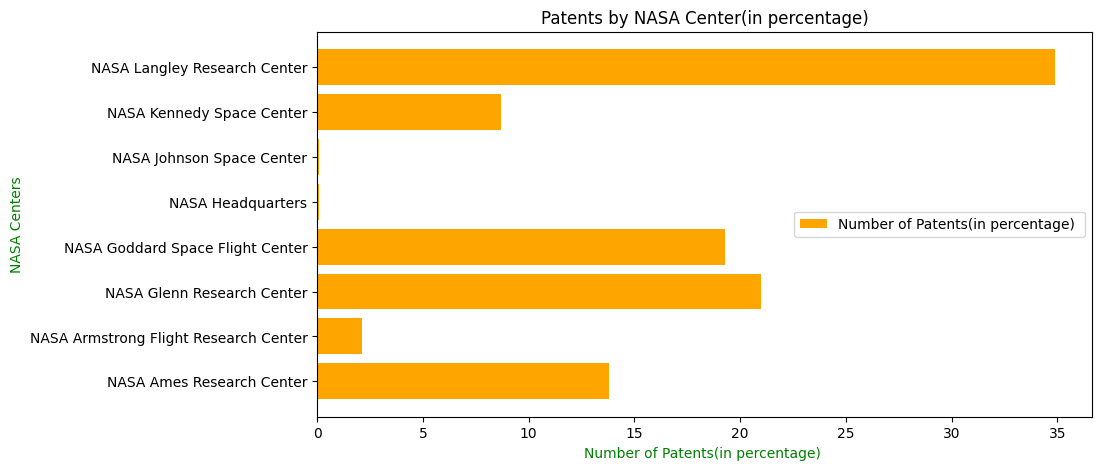

In [105]:
#To identify which centers have the most patents
# PLotting a horizontal bar graph for Patents by NASA Center(Percentage)
def Inventors(df):
 top_inventors = df_cleaned['center'].value_counts().sort_index()
 print(top_inventors)
 plt.figure(figsize=(10, 5))
 plt.barh(top_inventors.index, (top_inventors.values / top_inventors.sum()) * 100,label="Number of Patents(in percentage) ",color='orange')
 plt.legend(loc='center right')
 plt.title("Patents by NASA Center(in percentage)")
 plt.xlabel("Number of Patents(in percentage) ",color='g')

 plt.ylabel("NASA Centers",color='g')
 plt.show()
Inventors(df_cleaned)    
#NASA Langley Research center has been the top inventor and has contributed to 35% of total patents

In [73]:
#Patent status analysis


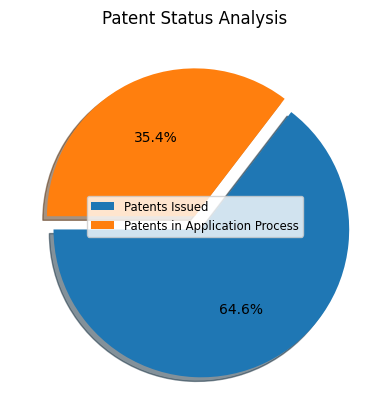

Patents Status:-- status
Issued         646
Application    354
Name: count, dtype: int64


In [113]:


def Patents_Status_Analysis(df): 
 patent_status_analysis=df['status'].value_counts()   
 exp = (0.1, 0)
 plt.pie(patent_status_analysis, autopct='%1.1f%%',startangle=180,explode=exp,shadow=True)
 plt.legend(labels=['Patents Issued', 'Patents in Application Process'], loc='center', fontsize='small')
 plt.title("Patent Status Analysis")
 plt.show()
 print("Patents Status:--",patent_status_analysis)
Patents_Status_Analysis(df_cleaned)

# 353 Patents are yet to be issued and are in process and 642 are the total issued patents


In [119]:
#Percentage of patents yet to be issued is 35.5%